In [1]:

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import argparse
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
img_info = pd.read_csv('ImgHESInfo.csv')

In [3]:
img_info.head()

ID (anonyme) ID PATIENT SAMPLE_id   Envoi Iarc scanner utilisé  \
0       TNE0001        393       NaN   03/11/2020           Leica   
1       TNE0002        400       NaN   03/11/2020           Leica   
2       TNE0003        492       NaN   03/11/2020           Leica   
3       TNE0004        609       NaN   03/11/2020           Leica   
4       TNE0005        716       NaN   03/11/2020           Leica   

  agrandissement HES. IHC Code Diag Diagnostique Origine  
0            x40      HES        CA     Atypical   Milan  
1            x40      HES        CA     Atypical   Milan  
2            x40      HES        CT      Typical   Milan  
3            x40      HES        CT      Typical   Milan  
4            x40      HES        CA     Atypical   Milan

In [4]:
img_info =  img_info.rename(columns={" ID (anonyme)" : "TNEID" })

In [5]:
# tets
rootdir  = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz'

In [6]:
def get_df(rootdir):
    path_ = f'{rootdir}/TumorNormal_test/Tumor/results_table.csv'
    df_ = pd.read_csv(path_)
    return df_

In [7]:
def get_train_df(rootdir):
    path_ = f'{rootdir}/TumorNormal_train/Tumor/results_table_train.csv'
    df_ = pd.read_csv(path_)
    return df_

In [8]:
df = pd.DataFrame()
df_ = get_df(rootdir)
df = df.append(df_)
df['Set'] = ['Test'] * df.shape[0]

In [9]:
df_tr = pd.DataFrame()
df_ = get_train_df(rootdir)
df_tr = df_tr.append(df_)
df_tr['Set'] = ['Train'] * df_tr.shape[0]

In [10]:
df_all = df.append(df_tr)

In [11]:
df_all.shape

(15946, 6)

In [12]:
df_all = df_all.iloc[:,1:]

In [13]:
i = 0
df_all.iloc[i,0].split('/')[-3]

'TNE0869'

In [14]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-3])
df_all['TNEID'] = sample_id

In [15]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-2])
df_all['Class'] = sample_id

In [16]:
mean_train = df_all.loc[(df_all['Set'] == 'Train') , 'MaxScoreAnomalyMap'].mean()
df_all['MSE'] = (mean_train - df_all['MaxScoreAnomalyMap'])**2

In [17]:
df_all.head()

FilesPath  BinaryLabels  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   

   MaxScoreAnomalyMap  MeanScoreAnomalyMap   Set    TNEID   Class       MSE  
0            2.232866             1.432099  Test  TNE0869   Tumor  0.001299  
1            1.820434             1.217720  Test  TNE0869  Normal  0.201124  
2            1.895194             1.193185  Test  TNE0869  Normal  0.139658  
3            2.273948             1.532143  Test  TNE1098  Normal  0.000025  
4            2.423360             1.612984  Test  TNE0869  Normal  0.023857

In [18]:
df_all.index = range(df_all.shape[0])

In [19]:
df_all.loc[df_all['Class']== 'Normal', 'BinaryLabels'] = 0

In [20]:
origin = []
for i in range(df_all.shape[0]):
    tne = df_all['TNEID'][i]
    print(tne)
    if tne == 'TNE0807' or tne == 'TNE0808':
        origin.append('Nancy')
    else:
        origin.append(img_info[img_info['TNEID'] == tne]['Origine'].values[0])

TNE0869
TNE0869
TNE0869
TNE1098
TNE0869
TNE1098
TNE0034
TNE0001
TNE0870
TNE0001
TNE0987
TNE0001
TNE0803
TNE0869
TNE0590
TNE1404
TNE0987
TNE0869
TNE0869
TNE1404
TNE0869
TNE0519
TNE1011
TNE1404
TNE1011
TNE0803
TNE0803
TNE1417
TNE1423
TNE0034
TNE1076
TNE0869
TNE1417
TNE1076
TNE1011
TNE0869
TNE1011
TNE0892
TNE1681
TNE1076
TNE0892
TNE1011
TNE0863
TNE0869
TNE0001
TNE0869
TNE0987
TNE0803
TNE0008
TNE0519
TNE0001
TNE1011
TNE0803
TNE1681
TNE0869
TNE0001
TNE0869
TNE0863
TNE0869
TNE0519
TNE1423
TNE0869
TNE0589
TNE0001
TNE1404
TNE1404
TNE1681
TNE1098
TNE1417
TNE0589
TNE0987
TNE0519
TNE0590
TNE1681
TNE1404
TNE1681
TNE1410
TNE1417
TNE1423
TNE0589
TNE0892
TNE0987
TNE1681
TNE0863
TNE1011
TNE0869
TNE1410
TNE0987
TNE1011
TNE0803
TNE0590
TNE1681
TNE1423
TNE0892
TNE0519
TNE1011
TNE0869
TNE0987
TNE0803
TNE1417
TNE1508
TNE0869
TNE0869
TNE1098
TNE1408
TNE0987
TNE0589
TNE1011
TNE1508
TNE1508
TNE1423
TNE1681
TNE0863
TNE1417
TNE0519
TNE1011
TNE0869
TNE1417
TNE0227
TNE0870
TNE0002
TNE1417
TNE1423
TNE0034
TNE1098


TNE1410
TNE0001
TNE1417
TNE1681
TNE0034
TNE0803
TNE1410
TNE0034
TNE1404
TNE1011
TNE0803
TNE0002
TNE0034
TNE1410
TNE0589
TNE1076
TNE0007
TNE0869
TNE1011
TNE1417
TNE1508
TNE1681
TNE0590
TNE1098
TNE0803
TNE0008
TNE1417
TNE1076
TNE1417
TNE0869
TNE1404
TNE0803
TNE0002
TNE1410
TNE0519
TNE1423
TNE1508
TNE1011
TNE0589
TNE1408
TNE1011
TNE0007
TNE1098
TNE0007
TNE0034
TNE1098
TNE0007
TNE0034
TNE0001
TNE0001
TNE0001
TNE1417
TNE0007
TNE0863
TNE1098
TNE0590
TNE1417
TNE1410
TNE1410
TNE0869
TNE0227
TNE0007
TNE0869
TNE0227
TNE0034
TNE0008
TNE0869
TNE1098
TNE1408
TNE0892
TNE0987
TNE1508
TNE0008
TNE1098
TNE1404
TNE1408
TNE1011
TNE0001
TNE0869
TNE1011
TNE0863
TNE0008
TNE0863
TNE1410
TNE0589
TNE0869
TNE1681
TNE0007
TNE0007
TNE0869
TNE0227
TNE1098
TNE1011
TNE1408
TNE1417
TNE0869
TNE0001
TNE0519
TNE0002
TNE1423
TNE0863
TNE0519
TNE0007
TNE0869
TNE1681
TNE1408
TNE1508
TNE0001
TNE1011
TNE0034
TNE0227
TNE1410
TNE1417
TNE0869
TNE1417
TNE0589
TNE0863
TNE0001
TNE0803
TNE1098
TNE0803
TNE1098
TNE0227
TNE0589
TNE0001


TNE0007
TNE1417
TNE0007
TNE0227
TNE1011
TNE0001
TNE1417
TNE0803
TNE1423
TNE0869
TNE1410
TNE1404
TNE0869
TNE0001
TNE0869
TNE1076
TNE0892
TNE0590
TNE1423
TNE1410
TNE0008
TNE0987
TNE1098
TNE0590
TNE1410
TNE1417
TNE1423
TNE0869
TNE0519
TNE0519
TNE0001
TNE1076
TNE1417
TNE1508
TNE1011
TNE0803
TNE0008
TNE1417
TNE1417
TNE0803
TNE0001
TNE0987
TNE0869
TNE0001
TNE0892
TNE0007
TNE1417
TNE0001
TNE0892
TNE1410
TNE0519
TNE1410
TNE0227
TNE0001
TNE0589
TNE1410
TNE0001
TNE0869
TNE1076
TNE0869
TNE1098
TNE1098
TNE0227
TNE1098
TNE0589
TNE0869
TNE1076
TNE0001
TNE1417
TNE1508
TNE0803
TNE1408
TNE0803
TNE0803
TNE0008
TNE0863
TNE0001
TNE0589
TNE0892
TNE0034
TNE0803
TNE1098
TNE1417
TNE0007
TNE0007
TNE0001
TNE1417
TNE1410
TNE0987
TNE0519
TNE0007
TNE0590
TNE0803
TNE0803
TNE0007
TNE0008
TNE1423
TNE0007
TNE0001
TNE0002
TNE1011
TNE0869
TNE0008
TNE1404
TNE1098
TNE1423
TNE1408
TNE0589
TNE0002
TNE1408
TNE0803
TNE1011
TNE0869
TNE1011
TNE0869
TNE0869
TNE0008
TNE1410
TNE1417
TNE0869
TNE0007
TNE0803
TNE0007
TNE0863
TNE0803


TNE0803
TNE0007
TNE0987
TNE0227
TNE1508
TNE1417
TNE0870
TNE1404
TNE0008
TNE1011
TNE0869
TNE1076
TNE1076
TNE0863
TNE0519
TNE1417
TNE0001
TNE1408
TNE0008
TNE1508
TNE1417
TNE1011
TNE1098
TNE0227
TNE0863
TNE0589
TNE1417
TNE0803
TNE0227
TNE0227
TNE0892
TNE1011
TNE0008
TNE1098
TNE0589
TNE1410
TNE1011
TNE0034
TNE1011
TNE1410
TNE0008
TNE1423
TNE1404
TNE0008
TNE0869
TNE0007
TNE0001
TNE0519
TNE0869
TNE0001
TNE1410
TNE0869
TNE0589
TNE0869
TNE0008
TNE0001
TNE1681
TNE0519
TNE1417
TNE1011
TNE1417
TNE0987
TNE1417
TNE1423
TNE1423
TNE1408
TNE0869
TNE0227
TNE1011
TNE0803
TNE0002
TNE1076
TNE1681
TNE0034
TNE1404
TNE0869
TNE1423
TNE1681
TNE1408
TNE0987
TNE1011
TNE1508
TNE0227
TNE0803
TNE1508
TNE1011
TNE0869
TNE0519
TNE1681
TNE0869
TNE0870
TNE1098
TNE1011
TNE0001
TNE1417
TNE1408
TNE0001
TNE0869
TNE0863
TNE1098
TNE1404
TNE1417
TNE1508
TNE0869
TNE0001
TNE0803
TNE0001
TNE1011
TNE0869
TNE0007
TNE1508
TNE1410
TNE0869
TNE0863
TNE0589
TNE0869
TNE0863
TNE0590
TNE0001
TNE1508
TNE0590
TNE0034
TNE0001
TNE1098
TNE0869


TNE1508
TNE1076
TNE0803
TNE1408
TNE0519
TNE0519
TNE1417
TNE1508
TNE0870
TNE1681
TNE0002
TNE0869
TNE1417
TNE0001
TNE0590
TNE1417
TNE0869
TNE1404
TNE0008
TNE0008
TNE0007
TNE0589
TNE0001
TNE0869
TNE1011
TNE1423
TNE0803
TNE1011
TNE0007
TNE0869
TNE0892
TNE1098
TNE1410
TNE1408
TNE1076
TNE1508
TNE0987
TNE0869
TNE0869
TNE0008
TNE1681
TNE0869
TNE0227
TNE0001
TNE1508
TNE0869
TNE0590
TNE1417
TNE0590
TNE0001
TNE0892
TNE1410
TNE1417
TNE1423
TNE0590
TNE0863
TNE0008
TNE0007
TNE0008
TNE0869
TNE0001
TNE1098
TNE0803
TNE1011
TNE1098
TNE0002
TNE1011
TNE1508
TNE0870
TNE1423
TNE0987
TNE0002
TNE0803
TNE0870
TNE0227
TNE0590
TNE1508
TNE0007
TNE0589
TNE0519
TNE1410
TNE0589
TNE0987
TNE0869
TNE0869
TNE1410
TNE1681
TNE1404
TNE1011
TNE1076
TNE0869
TNE1408
TNE0007
TNE0001
TNE1098
TNE0589
TNE1404
TNE0803
TNE1417
TNE0034
TNE0870
TNE0590
TNE0892
TNE0869
TNE0227
TNE1417
TNE1508
TNE0590
TNE1417
TNE0008
TNE0870
TNE1011
TNE1508
TNE0803
TNE0869
TNE1508
TNE0869
TNE0869
TNE0863
TNE1417
TNE0589
TNE0803
TNE0869
TNE0892
TNE1508


TNE0227
TNE0519
TNE1681
TNE0519
TNE0001
TNE0892
TNE1417
TNE1423
TNE1410
TNE0869
TNE1417
TNE0863
TNE1076
TNE1410
TNE1508
TNE1423
TNE1681
TNE1423
TNE0227
TNE1408
TNE1423
TNE0803
TNE0227
TNE1417
TNE0034
TNE1417
TNE0001
TNE0519
TNE1508
TNE1076
TNE1417
TNE1681
TNE1404
TNE0590
TNE0869
TNE0869
TNE0590
TNE0803
TNE0870
TNE0869
TNE0892
TNE0803
TNE0001
TNE1508
TNE1417
TNE1508
TNE1076
TNE1410
TNE0590
TNE0002
TNE0803
TNE1508
TNE0589
TNE0008
TNE0869
TNE1417
TNE1011
TNE1098
TNE1011
TNE0987
TNE0589
TNE0803
TNE0001
TNE1417
TNE0590
TNE1417
TNE0008
TNE0008
TNE0002
TNE0007
TNE0227
TNE1508
TNE1408
TNE0869
TNE0519
TNE0001
TNE0001
TNE1681
TNE1011
TNE0002
TNE0519
TNE1098
TNE0803
TNE1410
TNE1011
TNE1410
TNE0869
TNE1098
TNE1011
TNE1410
TNE1410
TNE0007
TNE0001
TNE0590
TNE0008
TNE1408
TNE0869
TNE0863
TNE1508
TNE0001
TNE1404
TNE1076
TNE1404
TNE1417
TNE1508
TNE1011
TNE1408
TNE1011
TNE1098
TNE0034
TNE1404
TNE0227
TNE1098
TNE0590
TNE0034
TNE0589
TNE1681
TNE0863
TNE1681
TNE1011
TNE0008
TNE0034
TNE1011
TNE1098
TNE0803


TNE1408
TNE0808
TNE0003
TNE1412
TNE2330
TNE2097
TNE0034
TNE1508
TNE0057
TNE0234
TNE0808
TNE0809
TNE2097
TNE0002
TNE1367
TNE0028
TNE1408
TNE0007
TNE1426
TNE0869
TNE1412
TNE0057
TNE1404
TNE0869
TNE0066
TNE0017
TNE0340
TNE1006
TNE1093
TNE0007
TNE1408
TNE0080
TNE0066
TNE0066
TNE0233
TNE0590
TNE1006
TNE1011
TNE0234
TNE0066
TNE0002
TNE0863
TNE1098
TNE1446
TNE1093
TNE2158
TNE1365
TNE0080
TNE0590
TNE0001
TNE0888
TNE1356
TNE1404
TNE0066
TNE0017
TNE1095
TNE1365
TNE0589
TNE0001
TNE1095
TNE0056
TNE0017
TNE1404
TNE0869
TNE1508
TNE0987
TNE1428
TNE1426
TNE0541
TNE0028
TNE2330
TNE1446
TNE1681
TNE0863
TNE1412
TNE0008
TNE0803
TNE0340
TNE0003
TNE1098
TNE1076
TNE0080
TNE0340
TNE1438
TNE1426
TNE0808
TNE1412
TNE1412
TNE1367
TNE1356
TNE2330
TNE2097
TNE2127
TNE0541
TNE0519
TNE0340
TNE0060
TNE0034
TNE0808
TNE1426
TNE1093
TNE0028
TNE0809
TNE0066
TNE0060
TNE0228
TNE0003
TNE0066
TNE0809
TNE0003
TNE0080
TNE1681
TNE1446
TNE0028
TNE2127
TNE0888
TNE0863
TNE1093
TNE1412
TNE2127
TNE1006
TNE1438
TNE1095
TNE1681
TNE0034


TNE2127
TNE0028
TNE0002
TNE0227
TNE1356
TNE1013
TNE1006
TNE1408
TNE1338
TNE1438
TNE2097
TNE0233
TNE1681
TNE2330
TNE1428
TNE2097
TNE1428
TNE1076
TNE0590
TNE0519
TNE1404
TNE0056
TNE1365
TNE0809
TNE0057
TNE0067
TNE2097
TNE1099
TNE1013
TNE2097
TNE1412
TNE0003
TNE0080
TNE1013
TNE1412
TNE0519
TNE0229
TNE0056
TNE0803
TNE0080
TNE0541
TNE0234
TNE0080
TNE1428
TNE1412
TNE0060
TNE2127
TNE1099
TNE1508
TNE1365
TNE0809
TNE0066
TNE1446
TNE1099
TNE1011
TNE0892
TNE1408
TNE1367
TNE2330
TNE1681
TNE2127
TNE1367
TNE0066
TNE0870
TNE0229
TNE0057
TNE1367
TNE0229
TNE1408
TNE1365
TNE0057
TNE1412
TNE1438
TNE0888
TNE1412
TNE1410
TNE0809
TNE1410
TNE0002
TNE0809
TNE0066
TNE0066
TNE0809
TNE0229
TNE1365
TNE1412
TNE0057
TNE0809
TNE0229
TNE2330
TNE0080
TNE0541
TNE0519
TNE1013
TNE0892
TNE0003
TNE1508
TNE1099
TNE0067
TNE0541
TNE0003
TNE1006
TNE0870
TNE1428
TNE0870
TNE0228
TNE0808
TNE1013
TNE0007
TNE1426
TNE0003
TNE1356
TNE1338
TNE1428
TNE0541
TNE1356
TNE0060
TNE0519
TNE1508
TNE1365
TNE1367
TNE0034
TNE0589
TNE1365
TNE1356


TNE1093
TNE1338
TNE0233
TNE1093
TNE1367
TNE0803
TNE1428
TNE0057
TNE1365
TNE0888
TNE0888
TNE0590
TNE1013
TNE0060
TNE1681
TNE1426
TNE1428
TNE1011
TNE0080
TNE1408
TNE0234
TNE1095
TNE0888
TNE2330
TNE1098
TNE0340
TNE1412
TNE1365
TNE1356
TNE1426
TNE1438
TNE1426
TNE0007
TNE0080
TNE0987
TNE1426
TNE2127
TNE0869
TNE1681
TNE0057
TNE0229
TNE1093
TNE0060
TNE1076
TNE0870
TNE0067
TNE1093
TNE0057
TNE0057
TNE0541
TNE0519
TNE0863
TNE1681
TNE1446
TNE0034
TNE1006
TNE0017
TNE1350
TNE0888
TNE1508
TNE1412
TNE0007
TNE1410
TNE0008
TNE1412
TNE2097
TNE1011
TNE0028
TNE0863
TNE1408
TNE0869
TNE0057
TNE0007
TNE2097
TNE0229
TNE0080
TNE0080
TNE1350
TNE0066
TNE0066
TNE1408
TNE0007
TNE1013
TNE0809
TNE0066
TNE0007
TNE1446
TNE0002
TNE1412
TNE2330
TNE1438
TNE1367
TNE0234
TNE0067
TNE1681
TNE0228
TNE0228
TNE1076
TNE0233
TNE1681
TNE1426
TNE2127
TNE0034
TNE1412
TNE1412
TNE0340
TNE1412
TNE0519
TNE0028
TNE1076
TNE0869
TNE0034
TNE0340
TNE0056
TNE1013
TNE1006
TNE0870
TNE0008
TNE1426
TNE0541
TNE1508
TNE1446
TNE0808
TNE0809
TNE0080


TNE2127
TNE0227
TNE1093
TNE2097
TNE0007
TNE1681
TNE0541
TNE0809
TNE0808
TNE1446
TNE0034
TNE0541
TNE1338
TNE0888
TNE1076
TNE0007
TNE0233
TNE0227
TNE0234
TNE1011
TNE0589
TNE0066
TNE1438
TNE1681
TNE0056
TNE1423
TNE0888
TNE0001
TNE2127
TNE1508
TNE0808
TNE0056
TNE0803
TNE0541
TNE1098
TNE1446
TNE0057
TNE1356
TNE0541
TNE0229
TNE1412
TNE1011
TNE1426
TNE1410
TNE1076
TNE0002
TNE0863
TNE1095
TNE0589
TNE2097
TNE0228
TNE0870
TNE0001
TNE1356
TNE2127
TNE0017
TNE1412
TNE1426
TNE0066
TNE0590
TNE1093
TNE1446
TNE0007
TNE1404
TNE0869
TNE0590
TNE1508
TNE1410
TNE0340
TNE1013
TNE0003
TNE0001
TNE1013
TNE2097
TNE1412
TNE0028
TNE0057
TNE0809
TNE1093
TNE1365
TNE0589
TNE2158
TNE0340
TNE2097
TNE0229
TNE0987
TNE2330
TNE0080
TNE0803
TNE0233
TNE0067
TNE0066
TNE1093
TNE0034
TNE0007
TNE2127
TNE0808
TNE1408
TNE2158
TNE1006
TNE0002
TNE0987
TNE1412
TNE0589
TNE0808
TNE0589
TNE1408
TNE1438
TNE0340
TNE1508
TNE2127
TNE1426
TNE1410
TNE1006
TNE0028
TNE0340
TNE0590
TNE1508
TNE0003
TNE0056
TNE1428
TNE2158
TNE1404
TNE1365
TNE0888


TNE0234
TNE1093
TNE1426
TNE0008
TNE1076
TNE0003
TNE1408
TNE0066
TNE0340
TNE0001
TNE0057
TNE1367
TNE2127
TNE0001
TNE0067
TNE1426
TNE0809
TNE0056
TNE0057
TNE2158
TNE1426
TNE0228
TNE0017
TNE1446
TNE0080
TNE1508
TNE1095
TNE1681
TNE1338
TNE0809
TNE2158
TNE0888
TNE2097
TNE1367
TNE0017
TNE0007
TNE0519
TNE0056
TNE0057
TNE1013
TNE0869
TNE1365
TNE0863
TNE0080
TNE1013
TNE0060
TNE0809
TNE0007
TNE0066
TNE1093
TNE0228
TNE0803
TNE1412
TNE2158
TNE1426
TNE1410
TNE2097
TNE1367
TNE0870
TNE1095
TNE1412
TNE0234
TNE0519
TNE0017
TNE0803
TNE1006
TNE1681
TNE1013
TNE1426
TNE0987
TNE0001
TNE1438
TNE0233
TNE0987
TNE0227
TNE0001
TNE2158
TNE1098
TNE0003
TNE1404
TNE0034
TNE0870
TNE1410
TNE1365
TNE2127
TNE0034
TNE1006
TNE0589
TNE0808
TNE0987
TNE1006
TNE1446
TNE1508
TNE1508
TNE0888
TNE0060
TNE2158
TNE1098
TNE0340
TNE1006
TNE0519
TNE0067
TNE1011
TNE1350
TNE1446
TNE1508
TNE0228
TNE0066
TNE2158
TNE0034
TNE1681
TNE0003
TNE1423
TNE0007
TNE0519
TNE1367
TNE0234
TNE0001
TNE1410
TNE0888
TNE0056
TNE0987
TNE0589
TNE0590
TNE0234


TNE1428
TNE0060
TNE1013
TNE0803
TNE0057
TNE1076
TNE0803
TNE1006
TNE1013
TNE0060
TNE1099
TNE1681
TNE1412
TNE0034
TNE0066
TNE0892
TNE0001
TNE0080
TNE1076
TNE1356
TNE0229
TNE0869
TNE0060
TNE0863
TNE0863
TNE0870
TNE0987
TNE1338
TNE1428
TNE0589
TNE1365
TNE0888
TNE0803
TNE0060
TNE1350
TNE0234
TNE0233
TNE0541
TNE1428
TNE0008
TNE0870
TNE0028
TNE0541
TNE0340
TNE0803
TNE0017
TNE1095
TNE0541
TNE0541
TNE1508
TNE0066
TNE2097
TNE0028
TNE0008
TNE1426
TNE1093
TNE1006
TNE1428
TNE1013
TNE1438
TNE0056
TNE2127
TNE1508
TNE0080
TNE0233
TNE1093
TNE0987
TNE1095
TNE0870
TNE2127
TNE0888
TNE1508
TNE1404
TNE0007
TNE0228
TNE1356
TNE0987
TNE0060
TNE1412
TNE0057
TNE0080
TNE0227
TNE0229
TNE2097
TNE1095
TNE1681
TNE0987
TNE0541
TNE0519
TNE2127
TNE2097
TNE1426
TNE1428
TNE1423
TNE1428
TNE0590
TNE0870
TNE0017
TNE1095
TNE1408
TNE1408
TNE1099
TNE0060
TNE0808
TNE0519
TNE2127
TNE0234
TNE0589
TNE0803
TNE1365
TNE0590
TNE2097
TNE1098
TNE0034
TNE0227
TNE0803
TNE0227
TNE0987
TNE0541
TNE1408
TNE1408
TNE0034
TNE0589
TNE0007
TNE1408


TNE2097
TNE0080
TNE0002
TNE0228
TNE0003
TNE1356
TNE1011
TNE0002
TNE1095
TNE1508
TNE1365
TNE2127
TNE1099
TNE1365
TNE0228
TNE0870
TNE2097
TNE1408
TNE1011
TNE1365
TNE0233
TNE0589
TNE1412
TNE0340
TNE0519
TNE1098
TNE0228
TNE0589
TNE0028
TNE1412
TNE0001
TNE0234
TNE1356
TNE1423
TNE1428
TNE0060
TNE0060
TNE0080
TNE0519
TNE0080
TNE1438
TNE0056
TNE1446
TNE1095
TNE0007
TNE0017
TNE0066
TNE0057
TNE0001
TNE1011
TNE0809
TNE1508
TNE0987
TNE0340
TNE0987
TNE0003
TNE1681
TNE0227
TNE1681
TNE0888
TNE0888
TNE1006
TNE1367
TNE0541
TNE0080
TNE1099
TNE1412
TNE1006
TNE0803
TNE0541
TNE1367
TNE1404
TNE0809
TNE1446
TNE0892
TNE1098
TNE0034
TNE1426
TNE1093
TNE1338
TNE1404
TNE2330
TNE0234
TNE1410
TNE0233
TNE0519
TNE1006
TNE2127
TNE0803
TNE1338
TNE0007
TNE1099
TNE1365
TNE0228
TNE1681
TNE0869
TNE0008
TNE0034
TNE1426
TNE0057
TNE2127
TNE0987
TNE1410
TNE2127
TNE1681
TNE1681
TNE1426
TNE2127
TNE1446
TNE1426
TNE0028
TNE1681
TNE0008
TNE0228
TNE1428
TNE0233
TNE1426
TNE0067
TNE0589
TNE1356
TNE0888
TNE0870
TNE1681
TNE1426
TNE2127


TNE0228
TNE1356
TNE0017
TNE1011
TNE2127
TNE0017
TNE0808
TNE0057
TNE1408
TNE1410
TNE0229
TNE0803
TNE0869
TNE0863
TNE1365
TNE1412
TNE0228
TNE1365
TNE1095
TNE0001
TNE1412
TNE0057
TNE0809
TNE0803
TNE0590
TNE0034
TNE0808
TNE1076
TNE0888
TNE1367
TNE0056
TNE1076
TNE1367
TNE1356
TNE2127
TNE1428
TNE1508
TNE0227
TNE1367
TNE1350
TNE0056
TNE0888
TNE0892
TNE1410
TNE0888
TNE2158
TNE1508
TNE0808
TNE2330
TNE0590
TNE0808
TNE2330
TNE1681
TNE1681
TNE1367
TNE1410
TNE1365
TNE2127
TNE0808
TNE0892
TNE0892
TNE0590
TNE1428
TNE1076
TNE0987
TNE0863
TNE1095
TNE1423
TNE1438
TNE0340
TNE2097
TNE0017
TNE0869
TNE2330
TNE2330
TNE0869
TNE0589
TNE0060
TNE0589
TNE1013
TNE0060
TNE0808
TNE0008
TNE1508
TNE1446
TNE1367
TNE1099
TNE0869
TNE2097
TNE1367
TNE1011
TNE0003
TNE0067
TNE1006
TNE0541
TNE0809
TNE1367
TNE0066
TNE1412
TNE0017
TNE0060
TNE0541
TNE0229
TNE0589
TNE1681
TNE1356
TNE0987
TNE0001
TNE1423
TNE0057
TNE1412
TNE0067
TNE0227
TNE0080
TNE0008
TNE1365
TNE0233
TNE0869
TNE0228
TNE1410
TNE1438
TNE1681
TNE1365
TNE1365
TNE2158


TNE1412
TNE0233
TNE1011
TNE0803
TNE0007
TNE1367
TNE1338
TNE0234
TNE1438
TNE0002
TNE0519
TNE1365
TNE0007
TNE0589
TNE1508
TNE0066
TNE0233
TNE0340
TNE1412
TNE0034
TNE1098
TNE2330
TNE0007
TNE0987
TNE0056
TNE0066
TNE0057
TNE0803
TNE1013
TNE0007
TNE0519
TNE1408
TNE0017
TNE1438
TNE1011
TNE0017
TNE1681
TNE0028
TNE1338
TNE0863
TNE1356
TNE1356
TNE2097
TNE1367
TNE0080
TNE1338
TNE0056
TNE2097
TNE1093
TNE0007
TNE1428
TNE1367
TNE1426
TNE0590
TNE0589
TNE1428
TNE0863
TNE1408
TNE0541
TNE0590
TNE0017
TNE0987
TNE1356
TNE1338
TNE1681
TNE1095
TNE0227
TNE1006
TNE1412
TNE0229
TNE1404
TNE0017
TNE0809
TNE1093
TNE0227
TNE2158
TNE1367
TNE1417
TNE0863
TNE0066
TNE0589
TNE1508
TNE0590
TNE1404
TNE1412
TNE1011
TNE0229
TNE1356
TNE0987
TNE0227
TNE1410
TNE1438
TNE1428
TNE0340
TNE1428
TNE0017
TNE1410
TNE1013
TNE1410
TNE0589
TNE0803
TNE0017
TNE1508
TNE1099
TNE1681
TNE2330
TNE0228
TNE2097
TNE1428
TNE0234
TNE0808
TNE0057
TNE0017
TNE1428
TNE1365
TNE1006
TNE2158
TNE1428
TNE0028
TNE0002
TNE2097
TNE0034
TNE0863
TNE0234
TNE0519


TNE0008
TNE1428
TNE1365
TNE0228
TNE1408
TNE1076
TNE0080
TNE0003
TNE1412
TNE1013
TNE0002
TNE1098
TNE2330
TNE0002
TNE0066
TNE0056
TNE1076
TNE1099
TNE1404
TNE2330
TNE0541
TNE0060
TNE0803
TNE0067
TNE0017
TNE1367
TNE1011
TNE0870
TNE2158
TNE0870
TNE2158
TNE0056
TNE0228
TNE0003
TNE1446
TNE0034
TNE0066
TNE0066
TNE1011
TNE0008
TNE1438
TNE1412
TNE0227
TNE2127
TNE0028
TNE1428
TNE2127
TNE0066
TNE1356
TNE0002
TNE2158
TNE0340
TNE1446
TNE0808
TNE0870
TNE0007
TNE1011
TNE0060
TNE0057
TNE0869
TNE1428
TNE2158
TNE0863
TNE1508
TNE0589
TNE1408
TNE0017
TNE1006
TNE1093
TNE0340
TNE1011
TNE1099
TNE1338
TNE1098
TNE2097
TNE0808
TNE1356
TNE1681
TNE0080
TNE0863
TNE0028
TNE0067
TNE1338
TNE1098
TNE0034
TNE0003
TNE0001
TNE1356
TNE1410
TNE0007
TNE1093
TNE1099
TNE1006
TNE0589
TNE2330
TNE0987
TNE0017
TNE1410
TNE0060
TNE0066
TNE0234
TNE0869
TNE1423
TNE1006
TNE0227
TNE1408
TNE1076
TNE0888
TNE1098
TNE0002
TNE1095
TNE0056
TNE2127
TNE0003
TNE0080
TNE0809
TNE0001
TNE0863
TNE0888
TNE0228
TNE1338
TNE1098
TNE0057
TNE0541
TNE0080


In [28]:
df_all['Origin'] = origin

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

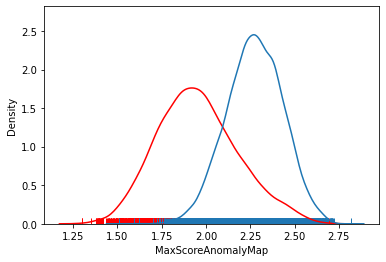

In [29]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumor']
sns.distplot(dfNormal['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

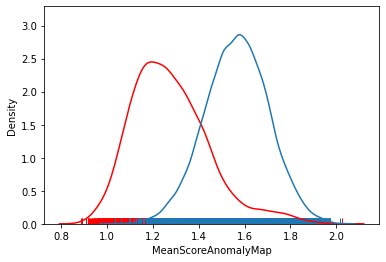

In [30]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumor']
sns.distplot(dfNormal['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MSE', ylabel='Density'>

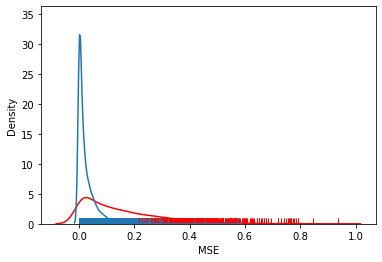

In [31]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumor']
sns.distplot(dfNormal['MSE'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MSE'], hist=False, rug=True)

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

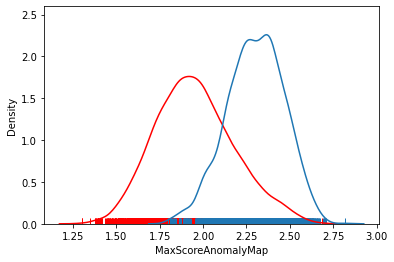

In [32]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumor']
sns.distplot(dfNorm['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

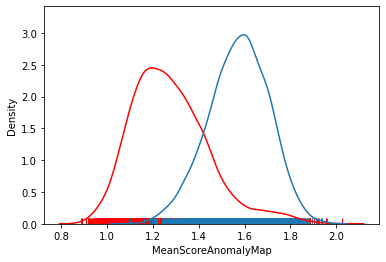

In [33]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumor']
sns.distplot(dfNorm['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

In [34]:
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MaxScoreAnomalyMap']))
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MeanScoreAnomalyMap']))
print(1- roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MSE']))

0.8861822622959208
0.9107174662651348
0.8140630189465725


In [35]:
set(df_all_test[df_all_test['Set'] == 'Test']['TNEID'])

{'TNE0001',
 'TNE0002',
 'TNE0007',
 'TNE0008',
 'TNE0034',
 'TNE0227',
 'TNE0519',
 'TNE0589',
 'TNE0590',
 'TNE0803',
 'TNE0863',
 'TNE0869',
 'TNE0870',
 'TNE0892',
 'TNE0987',
 'TNE1011',
 'TNE1076',
 'TNE1098',
 'TNE1404',
 'TNE1408',
 'TNE1410',
 'TNE1417',
 'TNE1423',
 'TNE1508',
 'TNE1681'}

In [36]:
tne_l =[]
ori_l = []
nb_normal = []
nb_tumor = []
roc_max = []
roc_mean = []
for tne in set(df_all_test[df_all_test['Set'] == 'Test']['TNEID']):
    print('TNEID = ', tne)
    tne_l.append(tne)
    ori_l.append(df_all_test[(df_all_test['TNEID'] == tne)]['Origin'].values[0])
    df_all_test_tne = df_all_test[ (df_all_test['TNEID'] == tne)]
    print('Normal ', df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    nb_normal.append(df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_test_tne[df_all_test_tne['Class'] == 'Tumor'].shape[0])
    nb_tumor.append(df_all_test_tne[df_all_test_tne['Class'] == 'Tumor'].shape[0])
    print('Max ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    roc_max.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    print('MEan ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
    roc_mean.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
  
    print('############################### \n')
roc_table = pd.DataFrame()
roc_table['TNEID'] = tne_l
roc_table['Origin'] = ori_l
roc_table['nb_normal'] = nb_normal
roc_table['nb_tumor'] = nb_tumor       
roc_table['roc_max'] = roc_max
roc_table['roc_mean'] = roc_mean

roc_table.to_csv('roc_table_tumor_normal.csv')

TNEID =  TNE0869
Normal  389
Tumor  314
Max  0.9104596139046714
MEan  0.9630524126864572
############################### 

TNEID =  TNE1011
Normal  277
Tumor  109
Max  0.8959692643990329
MEan  0.9631702712549266
############################### 

TNEID =  TNE0987
Normal  104
Tumor  40
Max  0.9944711538461538
MEan  0.9997596153846154
############################### 

TNEID =  TNE1404
Normal  139
Tumor  33
Max  0.9247874427730542
MEan  0.9834314366688468
############################### 

TNEID =  TNE0002
Normal  53
Tumor  37
Max  0.719020907700153
MEan  0.9184089750127487
############################### 

TNEID =  TNE0227
Normal  143
Tumor  26
Max  0.8275954814416353
MEan  0.9905863367401828
############################### 

TNEID =  TNE0008
Normal  191
Tumor  27
Max  0.7143688190808609
MEan  0.5417878611595889
############################### 

TNEID =  TNE0007
Normal  143
Tumor  94
Max  0.9848236869513465
MEan  0.9871298913852106
############################### 

TNEID =  TNE1417
Normal 

In [37]:
roc_table.head()

TNEID     Origin  nb_normal  nb_tumor   roc_max  roc_mean
0  TNE0869       Oslo        389       314  0.910460  0.963052
1  TNE1011  Melbourne        277       109  0.895969  0.963170
2  TNE0987      Paris        104        40  0.994471  0.999760
3  TNE1404       Lyon        139        33  0.924787  0.983431
4  TNE0002      Milan         53        37  0.719021  0.918409

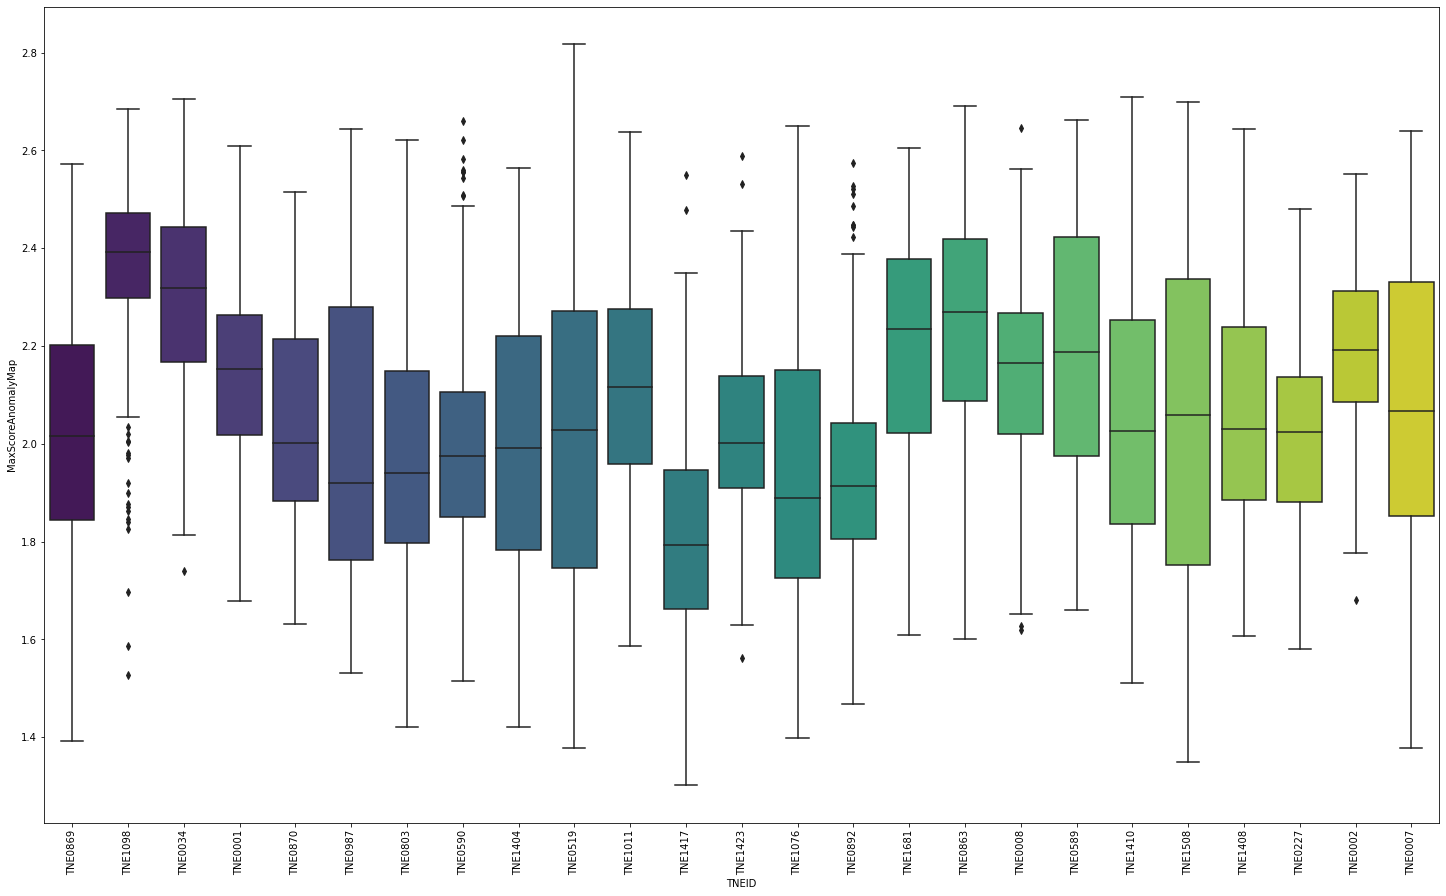

In [38]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MaxScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

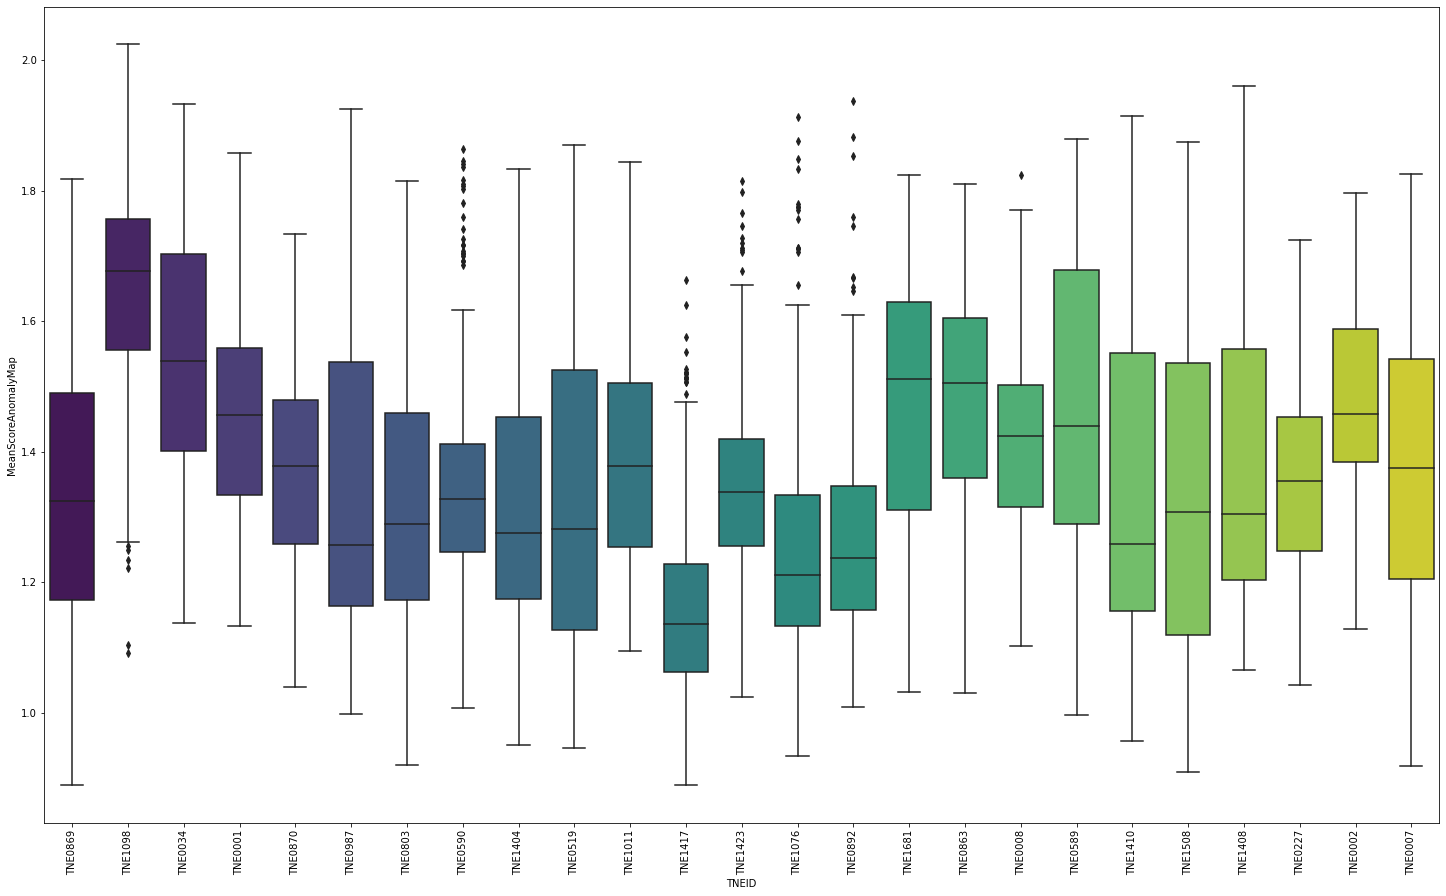

In [39]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MeanScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

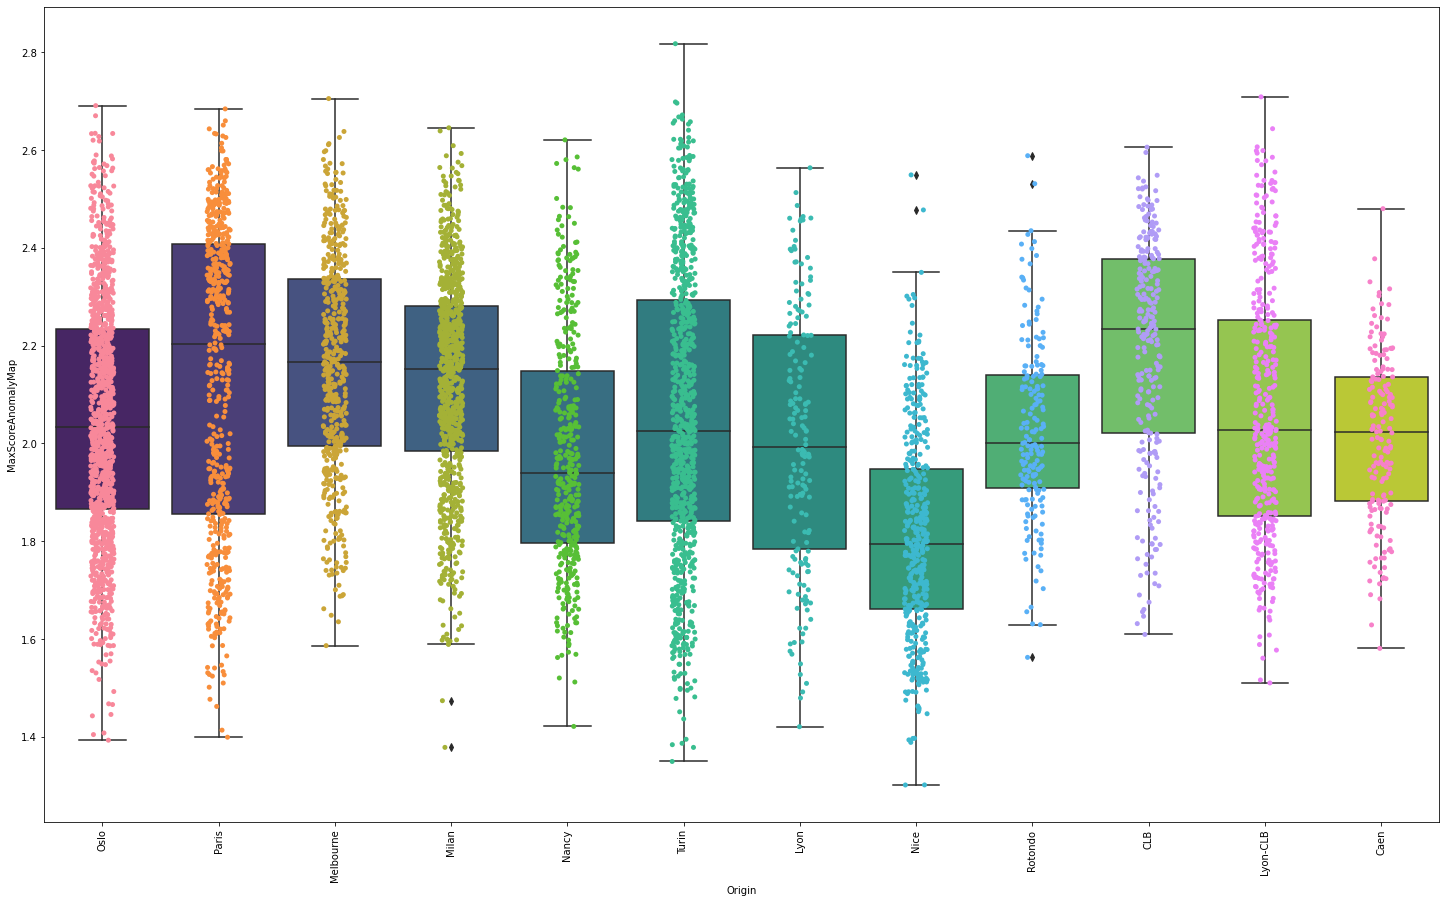

In [40]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['Origin'], y=df_all_test['MaxScoreAnomalyMap'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "MaxScoreAnomalyMap",     data = df_all_test)
ax.tick_params(axis='x', rotation=90)

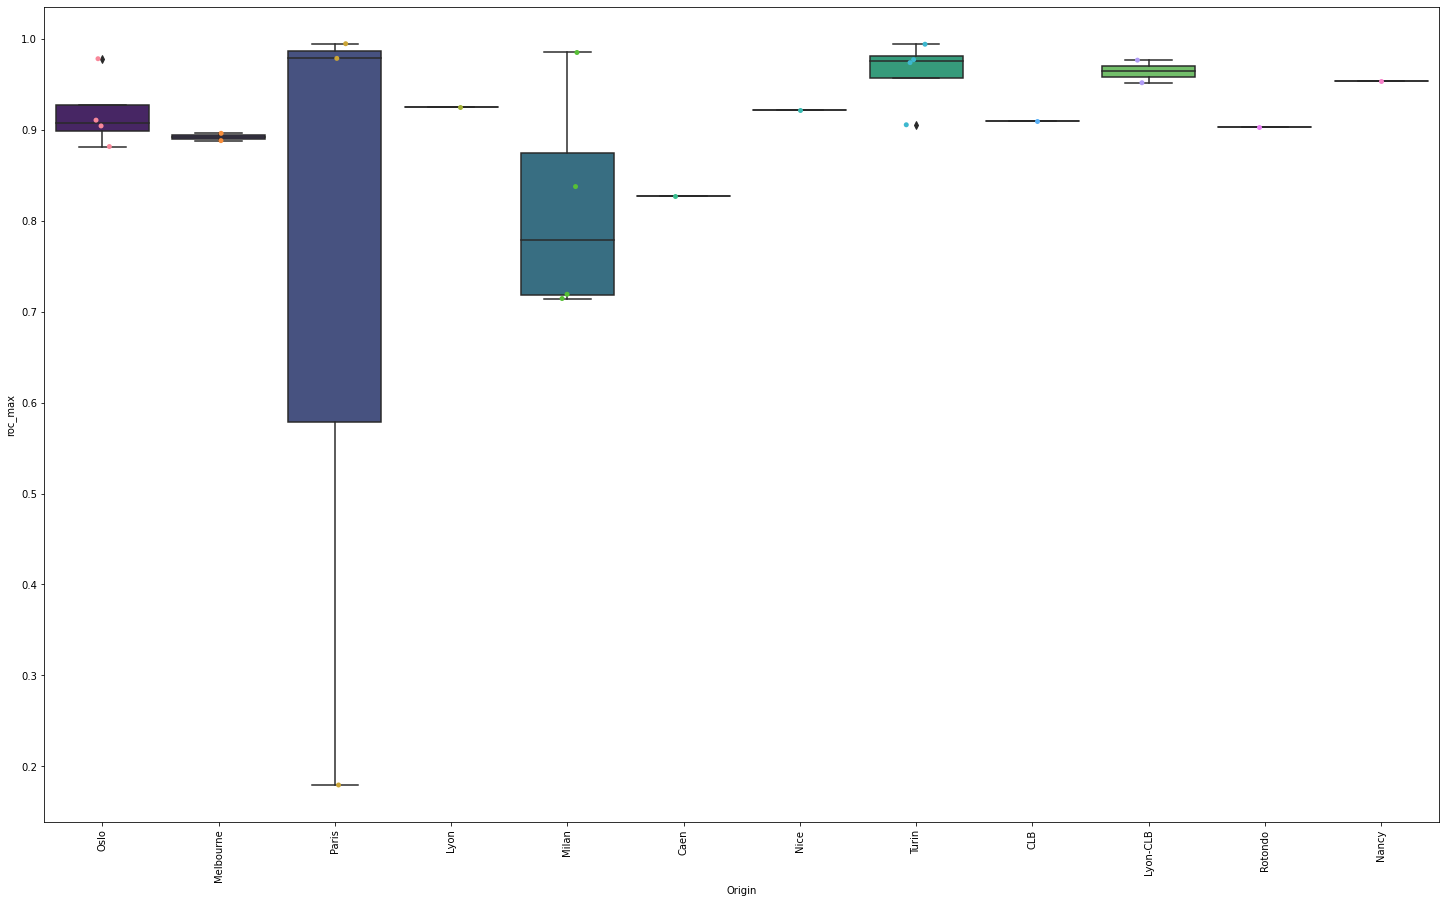

In [41]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=roc_table['Origin'], y=roc_table['roc_max'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "roc_max",     data = roc_table)
ax.tick_params(axis='x', rotation=90)

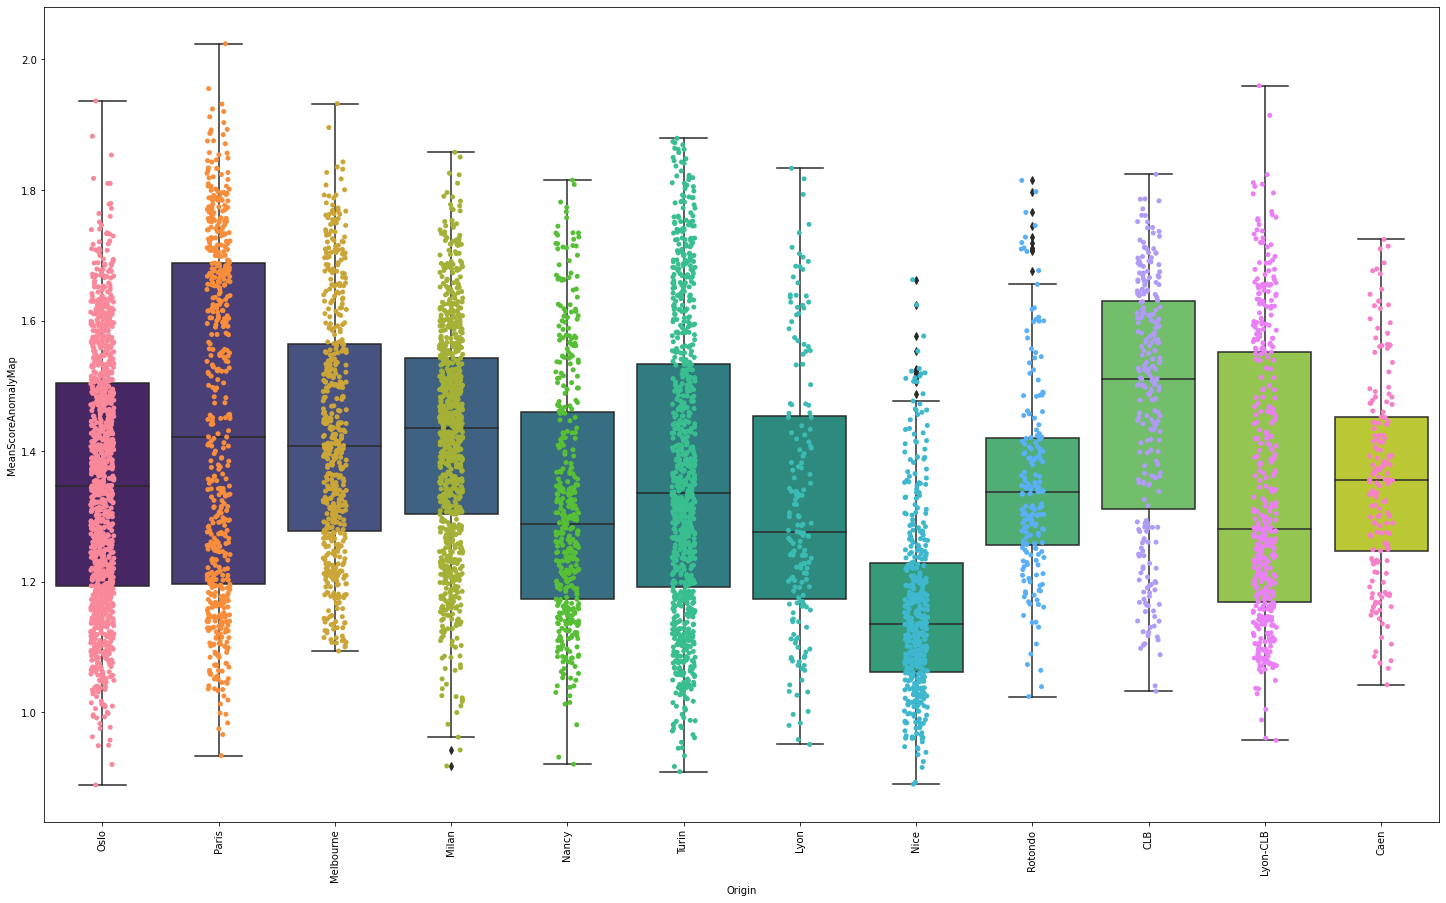

In [42]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['Origin'], y=df_all_test['MeanScoreAnomalyMap'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "MeanScoreAnomalyMap",     data = df_all_test)
ax.tick_params(axis='x', rotation=90)

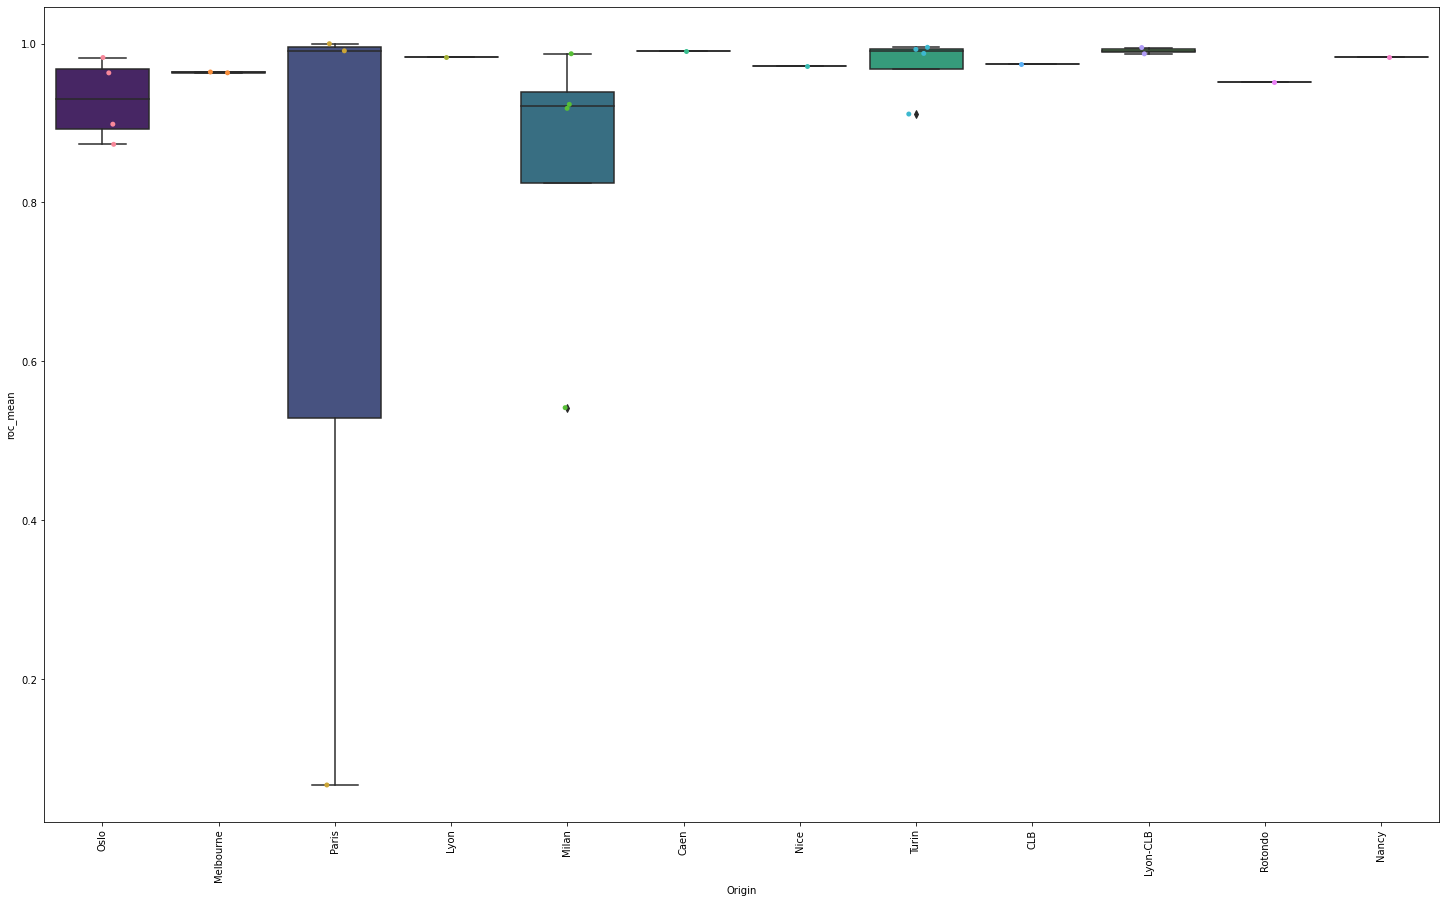

In [43]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=roc_table['Origin'], y=roc_table['roc_mean'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "roc_mean",     data = roc_table)
ax.tick_params(axis='x', rotation=90)

In [46]:
origin_l =[]
nb_normal = []
nb_tumor = []
roc_max = []
roc_mean = []
roc_loss = []
roc_max_div_loss = []
for ori in set(df_all_test[df_all_test['Set'] == 'Test']['Origin']):
    print('Origin = ', ori)
    origin_l.append(ori)
    df_all_ori = df_all_test[(df_all_test['Origin'] == ori)]
    print('Normal ', df_all_ori[df_all_ori['Class'] == 'Normal'].shape[0])
    nb_normal.append(df_all_ori[df_all_ori['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_ori[df_all_ori['Class'] == 'Tumor'].shape[0])
    nb_tumor.append(df_all_ori[df_all_ori['Class'] == 'Tumor'].shape[0])
    print('Max ',roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MaxScoreAnomalyMap']))
    roc_max.append(roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MaxScoreAnomalyMap']))
    print('MEan ',roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MeanScoreAnomalyMap']))
    roc_mean.append(roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MeanScoreAnomalyMap']))
   
    print('############################### \n')
roc_table = pd.DataFrame()
roc_table['Origin'] = origin_l
roc_table['nb_normal'] = nb_normal
roc_table['nb_tumor'] = nb_tumor       
roc_table['roc_max'] = roc_max
roc_table['roc_mean'] = roc_mean


Origin =  Lyon
Normal  139
Tumor  33
Max  0.9247874427730542
MEan  0.9834314366688468
############################### 

Origin =  Nice
Normal  417
Tumor  21
Max  0.9217768642229074
MEan  0.9720223820943246
############################### 

Origin =  Milan
Normal  633
Tumor  272
Max  0.8559497258619088
MEan  0.8901124430814981
############################### 

Origin =  Rotondo
Normal  154
Tumor  26
Max  0.9028471528471529
MEan  0.9517982017982018
############################### 

Origin =  Oslo
Normal  720
Tumor  518
Max  0.9106740669240668
MEan  0.9373069498069497
############################### 

Origin =  Paris
Normal  463
Tumor  107
Max  0.6955955673078863
MEan  0.6718374679558345
############################### 

Origin =  Nancy
Normal  291
Tumor  118
Max  0.9535500029122256
MEan  0.9824684023530782
############################### 

Origin =  Turin
Normal  561
Tumor  313
Max  0.9527771608207616
MEan  0.9520311174135644
############################### 

Origin =  Melbourne
Normal  

In [47]:
roc_table

Origin  nb_normal  nb_tumor   roc_max  roc_mean
0        Lyon        139        33  0.924787  0.983431
1        Nice        417        21  0.921777  0.972022
2       Milan        633       272  0.855950  0.890112
3     Rotondo        154        26  0.902847  0.951798
4        Oslo        720       518  0.910674  0.937307
5       Paris        463       107  0.695596  0.671837
6       Nancy        291       118  0.953550  0.982468
7       Turin        561       313  0.952777  0.952031
8   Melbourne        335       185  0.904720  0.965599
9        Caen        143        26  0.827595  0.990586
10        CLB         98       158  0.909842  0.974361
11   Lyon-CLB        279       125  0.953032  0.984803

In [146]:
threshold = np.linspace(np.min(df_all_test['MeanScoreAnomalyMap']), np.max(df_all_test['MeanScoreAnomalyMap']), 500)
precision_list = []
recall_list = []
f1_list = []
roc_list = []
FPR_list = []
TPR_list = []
specifity_list = []
sensitivity_list = []
print(len(threshold))
#df_299 = df_299[(df_299['TNEID'] == 'TNE0001') | (df_299['TNEID'] == 'TNE0803')]
df_MaxAnomalyScore = df_all_test['MeanScoreAnomalyMap']
df_exp_label = df_all_test['BinaryLabels']
for j in range(len(threshold)):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    emp_label = []

    for i in range(df_all_test.shape[0]):
        MSEFM = df_MaxAnomalyScore.iloc[i]
        exp_label = df_exp_label.iloc[i]
        if MSEFM <= threshold[j]:
            empirique_label = 0
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TN += 1
            else:
                FN += 1
        else:
            empirique_label = 1
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TP += 1
            else:
                FP += 1
    try :
        precision = TP / (TP + FP)
    except:
        precision = 0
    try:
        recall = TP / (TP + FN) #sensibilite 
    except:
        recall = 0
    try:
        sprecificite = TN / (TN+FP)
    except:
        sprecificite = 0
    try:
        sensitivity = TP/ (TP+FN)
    except:
        sensitivity = 0
    try:
        TPR = TP / (TP + FN)
    except:
        TPR = 0
    try:
        spe = TN/(TN + FP)
    except :
        spe = 0
    try:
        FPR = FP / (FP + TN)
    except:
        FPR = 0
    FPR_list.append(FPR)
    TPR_list.append(TPR)
    specifity_list.append(spe)
    sensitivity_list.append(sensitivity)
    y_true = np.array(df_exp_label.tolist())
    y_scores = np.array(emp_label)
    #roc = roc_auc_score(y_true,y_scores) # ?????
    
    precision_list.append(precision)
    recall_list.append(recall)
    #roc_list.append(roc)

500


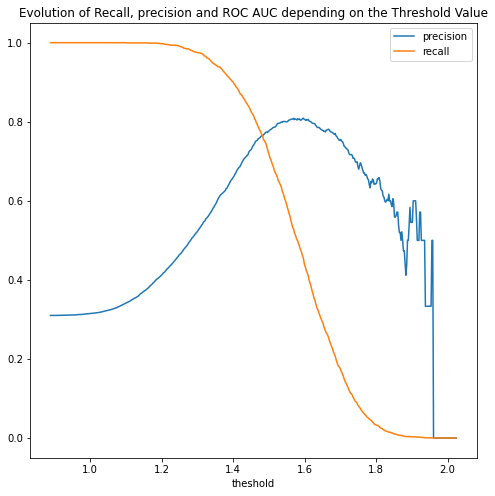

In [147]:
plt.figure(figsize=(8,8))
plt.plot(threshold, precision_list, label='precision')
plt.plot(threshold, recall_list, label='recall')
#plt.plot(threshold, roc_list, label='roc_auc')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

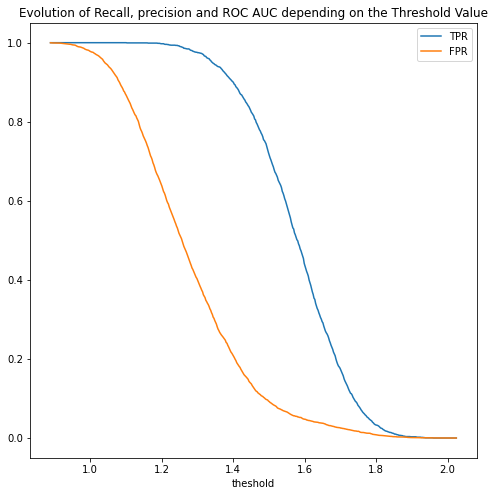

In [148]:
plt.figure(figsize=(8,8))
plt.plot(threshold, TPR_list, label='TPR')
plt.plot(threshold, FPR_list, label='FPR')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

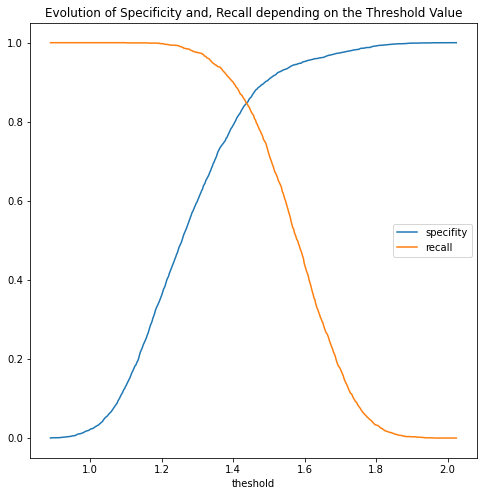

In [149]:
plt.figure(figsize=(8,8))
plt.plot(threshold, specifity_list, label='specifity')
plt.plot(threshold, recall_list, label='recall')
plt.legend()
plt.title('Evolution of Specificity and, Recall depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

No handles with labels found to put in legend.


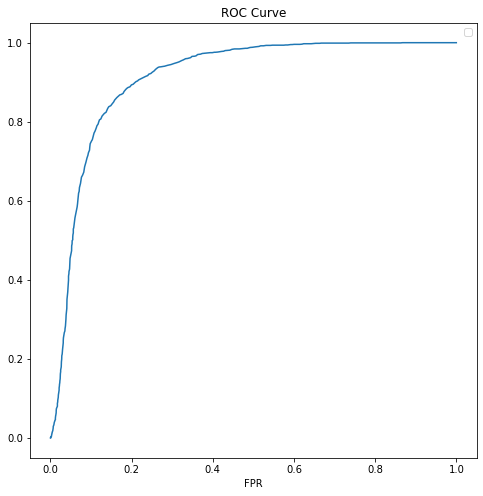

In [150]:
# ROC Curve
plt.figure(figsize=(8,8))
plt.plot(FPR_list, TPR_list)
plt.legend()
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.show()

No handles with labels found to put in legend.


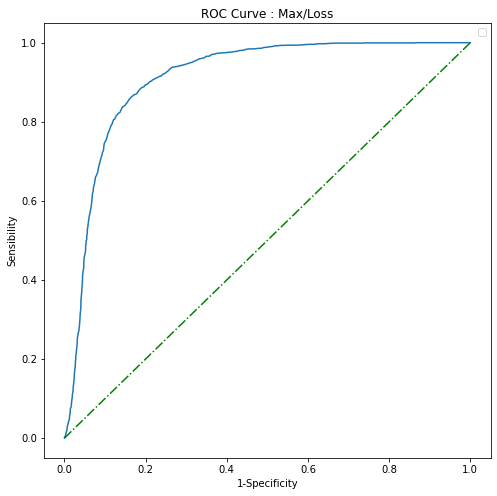

In [151]:
# ROC Curve
x = np.linspace(0,1,100)
y = x
plt.figure(figsize=(8,8))
plt.plot( 1- np.array(specifity_list) , sensitivity_list)
plt.plot(x, y,'-.g')
plt.legend()
plt.title('ROC Curve : Max/Loss')
plt.xlabel('1-Specificity')
plt.ylabel('Sensibility')

plt.show()

## Youden Index

In [152]:
df_metric = pd.DataFrame()
df_metric['threshold'] = threshold
df_metric['Recall'] = TPR_list
df_metric['FPR'] = FPR_list
df_metric['Precison'] = precision_list
df_metric['Specifity'] = specifity_list
df_metric['Sensitivity'] = sensitivity_list
df_metric['Recall/Specifity'] = np.array(TPR_list)/ np.array(specifity_list)

In [153]:
df_metric['YoudenIndex'] = df_metric['Sensitivity'] + df_metric['Specifity'] -1

+ Pr = TP / (TP + FP)
+ Recall = TP  / (TP + FN)


In [154]:
df_metric.head()

threshold  Recall       FPR  Precison  Specifity  Sensitivity  \
0   0.888700     1.0  0.999764  0.310075   0.000236          1.0   
1   0.890975     1.0  0.999528  0.310126   0.000472          1.0   
2   0.893251     1.0  0.999291  0.310176   0.000709          1.0   
3   0.895526     1.0  0.999291  0.310176   0.000709          1.0   
4   0.897801     1.0  0.999291  0.310176   0.000709          1.0   

   Recall/Specifity  YoudenIndex  
0            4233.0     0.000236  
1            2116.5     0.000472  
2            1411.0     0.000709  
3            1411.0     0.000709  
4            1411.0     0.000709

In [155]:
youden_threshold = df_metric[df_metric['YoudenIndex'] == max(df_metric['YoudenIndex'])]['threshold'].values

In [156]:
youden_threshold

array([1.42796058])

In [157]:
max(df_metric['YoudenIndex'])

0.6977212990019086

In [158]:
df_metric[(df_metric['Recall'] < 1) & (df_metric['Recall'] > 0.85)]

threshold    Recall       FPR  Precison  Specifity  Sensitivity  \
94    1.102584  0.999474  0.862745  0.342337   0.137255     0.999474   
95    1.104859  0.999474  0.858020  0.343575   0.141980     0.999474   
96    1.107135  0.999474  0.854240  0.344571   0.145760     0.999474   
97    1.109410  0.999474  0.850224  0.345636   0.149776     0.999474   
98    1.111685  0.999474  0.846208  0.346708   0.153792     0.999474   
..         ...       ...       ...       ...        ...          ...   
236   1.425685  0.864353  0.166785  0.699574   0.833215     0.864353   
237   1.427961  0.861199  0.163477  0.703004   0.836523     0.861199   
238   1.430236  0.857518  0.160170  0.706366   0.839830     0.857518   
239   1.432511  0.854890  0.158044  0.708497   0.841956     0.854890   
240   1.434787  0.850158  0.155682  0.710457   0.844318     0.850158   

     Recall/Specifity  YoudenIndex  
94           7.281884     0.136729  
95           7.039558     0.141454  
96           6.857009     0.145234  
97           6.673146     0.149250  
98           6.498885     0.153266  
..                ...          ...  
236          1.037371     0.697569  
237          1.029499     0.697721  
238          1.021062     0.697348  
239          1.015361     0.696846  
240          1.006916     0.694476  

[147 rows x 8 columns]

In [159]:
#youden_threshold = -0.000012

In [160]:
classif_best_thr = []
pred_label = []
for i in range(df_all_test.shape[0]):
    if df_all_test.iloc[i,:]['MeanScoreAnomalyMap']  < youden_threshold:
        pred_label.append('Normal')
    else:
        pred_label.append('Tumor')

In [161]:
df_all_test['PredLabel'] = pred_label

In [162]:
df_all_test.head()

FilesPath  BinaryLabels  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             0   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             0   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             0   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             0   

   MaxScoreAnomalyMap  MeanScoreAnomalyMap   Set    TNEID   Class       MSE  \
0            2.232866             1.432099  Test  TNE0869   Tumor  0.001299   
1            1.820434             1.217720  Test  TNE0869  Normal  0.201124   
2            1.895194             1.193185  Test  TNE0869  Normal  0.139658   
3            2.273948             1.532143  Test  TNE1098  Normal  0.000025   
4            2.423360             1.612984  Test  TNE0869  Normal  0.023857   

  Origin PredLabel  
0   Oslo     Tumor  
1   Oslo    Normal  
2   Oslo    Normal  
3  Paris     Tumor  
4   Oslo     Tumor

In [163]:
df_all_test.iloc[0,0]

'/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0869/Tumor/TNE0869_15361_56449.jpg'

In [164]:
df_all_test[(df_all_test['Class'] == 'Tumor')].shape

(1902, 10)

In [165]:
df_all_test[(df_all_test['Class'] == 'Normal')].shape

(4233, 10)

In [166]:
# True positive %
df_all_test[(df_all_test['Class'] == 'Normal') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] / df_all_test[(df_all_test['Class'] == 'Normal')].shape[0]

0.8365225608315615

In [167]:
TP  = df_all_test[(df_all_test['Class'] == 'Normal') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] 

In [168]:
# Faux Negatif %
df_all_test[(df_all_test['Class'] == 'Normal') & 
           (df_all_test['PredLabel'] == 'Tumor')].shape[0] /  df_all_test[(df_all_test['Class'] == 'Normal')].shape[0]

0.16347743916843846

In [169]:
FN  = df_all_test[(df_all_test['Class'] == 'Normal') & 
           (df_all_test['PredLabel'] == 'Tumor')].shape[0] 

In [170]:
# Vrai negatif %
df_all_test[(df_all_test['Class'] == 'Tumor') & 
                (df_all_test['PredLabel'] == 'Tumor')].shape[0] / df_all_test[(df_all_test['Class'] == 'Tumor')].shape[0]

0.861198738170347

In [171]:
TN = df_all_test[(df_all_test['Class'] == 'Tumor') & 
                (df_all_test['PredLabel'] == 'Tumor')].shape[0] 

In [172]:
# Faux Positif % 
df_all_test[(df_all_test['Class'] == 'Tumor') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] / df_all_test[(df_all_test['Class'] == 'Tumor')].shape[0]

0.138801261829653

In [173]:
FP = df_all_test[(df_all_test['Class'] == 'Tumor') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0]

In [174]:
# Sensitivity current
#  Out of all the people that have the disease, how many got positive test results?
Sn  = TP / (TP + FN)
print('Sensitivity = '  , Sn)

Sensitivity =  0.8365225608315615


In [175]:
# Specificity current
# Out of all the people that do not have the disease, how many got negative results?
Sp = TN / (TN + FP)
print('Specificity = '  , Sp)

Specificity =  0.861198738170347


In [176]:
# Pr current
# Out of all the examples that predicted as positive, how many are really positive?
Pr = TP / (TP + FP)
print('Precision = '  , Pr)


Precision =  0.9306176084099869


In [177]:

for tne in set(df_all_test[df_all_test['Set'] == 'Test']['TNEID']):
    print('TNEID = ', tne)
    print(df_all_test[(df_all_test['TNEID'] == tne)]['Origin'].values[0])
    df_all_test_tne = df_all_test[ (df_all_test['TNEID'] == tne)]
    print('Normal ', df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_test_tne[df_all_test_tne['Class'] == 'Tumor'].shape[0])
    TP  = df_all_test_tne[(df_all_test_tne['Class'] == 'Normal') &  
                (df_all_test_tne['PredLabel'] == 'Normal')].shape[0] 
    FN  = df_all_test_tne[(df_all_test_tne['Class'] == 'Normal') & 
           (df_all_test_tne['PredLabel'] == 'Tumor')].shape[0] 
    TN = df_all_test_tne[(df_all_test_tne['Class'] == 'Tumor') & 
                (df_all_test_tne['PredLabel'] == 'Tumor')].shape[0] 
    FP = df_all_test_tne[(df_all_test_tne['Class'] == 'Tumor') &  
                (df_all_test_tne['PredLabel'] == 'Normal')].shape[0]
    
    print('Precision =', TP / (TP + FP))
    print('Sensitivity  = ', TP / (TP + FN))
    print('Specificity = ', TN / (TN + FP))
    print('############################### \n')


TNEID =  TNE0869
Oslo
Normal  389
Tumor  314
Precision = 0.8099352051835853
Sensitivity  =  0.9640102827763496
Specificity =  0.7197452229299363
############################### 

TNEID =  TNE1011
Melbourne
Normal  277
Tumor  109
Precision = 0.9710743801652892
Sensitivity  =  0.8483754512635379
Specificity =  0.9357798165137615
############################### 

TNEID =  TNE0987
Paris
Normal  104
Tumor  40
Precision = 1.0
Sensitivity  =  0.9903846153846154
Specificity =  1.0
############################### 

TNEID =  TNE1404
Lyon
Normal  139
Tumor  33
Precision = 0.9919354838709677
Sensitivity  =  0.8848920863309353
Specificity =  0.9696969696969697
############################### 

TNEID =  TNE0002
Milan
Normal  53
Tumor  37
Precision = 0.9230769230769231
Sensitivity  =  0.6792452830188679
Specificity =  0.918918918918919
############################### 

TNEID =  TNE0227
Caen
Normal  143
Tumor  26
Precision = 1.0
Sensitivity  =  0.8251748251748252
Specificity =  1.0
###################

## Misclassified Tumor

In [180]:
miss_tumor = df_all_test[(df_all_test['Class'] == 'Tumor') 
                             &  (df_all_test['PredLabel'] == 'Normal')]

In [181]:
miss_tumor.head()

FilesPath  BinaryLabels  \
35   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   
42   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   
94   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   
96   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   
120  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...             1   

     MaxScoreAnomalyMap  MeanScoreAnomalyMap   Set    TNEID  Class       MSE  \
35             2.002000             1.307706  Test  TNE0869  Tumor  0.071237   
42             2.161311             1.238522  Test  TNE0863  Tumor  0.011576   
94             2.144668             1.425612  Test  TNE0519  Tumor  0.015434   
96             1.882506             1.376351  Test  TNE0869  Tumor  0.149302   
120            2.150835             1.406839  Test  TNE0002  Tumor  0.013940   

    Origin PredLabel  
35    Oslo    Normal  
42    Oslo    Normal  
94   Turin    Normal  
96    Oslo    Normal  
120  Milan    Normal

In [183]:
miss_tumor.shape
miss_tumor = miss_tumor.sample(frac=1).reset_index(drop=True)
miss_tumor = miss_tumor.sort_values(by = 'MeanScoreAnomalyMap', ascending=True)

In [ ]:
miss_tumor.head()

In [ ]:
var

In [ ]:
def plot_10_tiles(anom_path,miss_tumor, min_b ,  max_b , norm = True):
    fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(6,14))  
    j = 0 
    i = 0
    for p in miss_tumor['Path2Image'].iloc[:10]:
        im = cv2.imread(p)
#         print(p)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#         print(p)
        anom_name = 'anom_path  +  str(p[71:-3]) + 'npy'
#         try:
#         print(anom_name)
        if os.path.exists(anom_name):
          
            anom_map = np.load(anom_name, allow_pickle=True) 
        
        axes[i,0].imshow(im) 
        axes[i,0].axis('off')
        if norm:
            axes[i,1].imshow(anom_map, cmap = 'jet', vmin = min_b  , vmax =   max_b  ) 
        else:
            axes[i,1].imshow(anom_map, cmap = 'jet' ) 
        axes[i,1].axis('off')
        i +=1  

        
        fig.tight_layout()
plot_10_tiles(miss_tumor, Min, Max)

In [ ]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Tumor'
plot_10_tiles(miss_tumor, Q1, Q9, False)

In [ ]:
plot_10_tiles(miss_tumor, Min, Q95)

## Misclassified Normal

In [205]:
miss_normal = df_all_499_test[(df_all_499_test['Sample'] == 'Normal') & 
                              (df_all_499_test['PredLabel'] == 'Tumor')]

In [206]:
miss_normal = miss_normal.sort_values(by = 'Max/Loss', ascending=False)

In [207]:
miss_normal

Path2Image  Sample          Loss  \
286  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -51561.431641   
74   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -48643.465820   
11   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -48471.859375   
183  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -48695.373047   
290  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50485.837891   
..                                                 ...     ...           ...   
618  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -41638.079102   
192  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -41627.234375   
180  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -40297.267578   
416  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -41196.291016   
50   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -40597.716797   

     MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID           MSE  \
286         -0.622205        -0.596374    499  Test  TNE0869  1.447111e+07   
74          -0.599962        -0.562709    499  Test  TNE0869  7.852193e+05   
11          -0.614555        -0.560752    499  Test  TNE0869  5.105382e+05   
183         -0.591563        -0.563367    499  Test  TNE0869  8.799064e+05   
290         -0.608996        -0.584374    499  Test  TNE0869  7.444702e+06   
..                ...              ...    ...   ...      ...           ...   
618         -0.586893        -0.559559    499  Test  TNE1011  3.744535e+07   
192         -0.600983        -0.563783    499  Test  TNE0869  3.757819e+07   
180         -0.578384        -0.548573    499  Test  TNE0869  5.565268e+07   
416         -0.594124        -0.561192    499  Test  TNE1011  4.304736e+07   
50          -0.584804        -0.553748    499  Test  TNE0869  5.126020e+07   

     Binary_label  loss_normal  Max/Loss PredLabel  
286             1     0.305032 -0.000012     Tumor  
74              1     0.463536 -0.000012     Tumor  
11              1     0.472858 -0.000012     Tumor  
183             1     0.460717 -0.000012     Tumor  
290             1     0.363458 -0.000012     Tumor  
..            ...          ...       ...       ...  
618             1     0.844071 -0.000013     Tumor  
192             1     0.844660 -0.000014     Tumor  
180             1     0.916905 -0.000014     Tumor  
416             1     0.868069 -0.000014     Tumor  
50              1     0.900584 -0.000014     Tumor  

[455 rows x 13 columns]

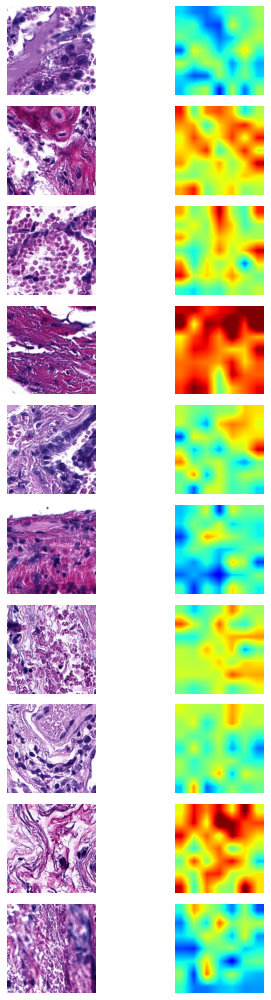

In [208]:
plot_10_tiles(miss_normal, Min, Max)

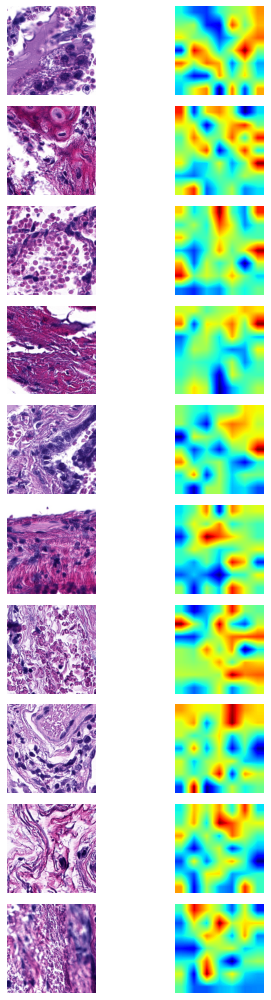

In [209]:
plot_10_tiles(miss_normal, Min, Max, False)

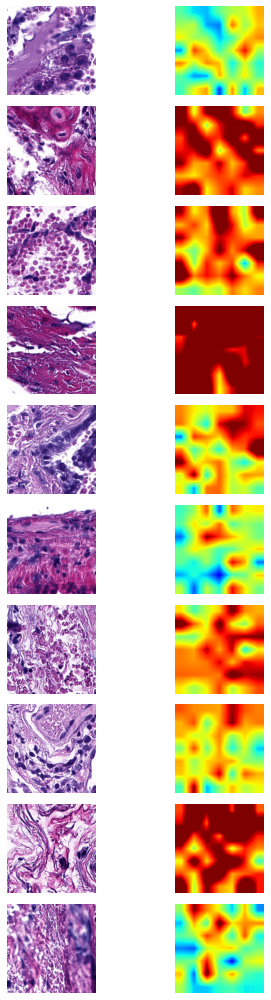

In [210]:
plot_10_tiles(miss_normal, Min, Q95)

## Most discriminant

In [211]:
best_normal = df_all_499_test[(df_all_499_test['Sample'] == 'Normal') &  
                              (df_all_499_test['PredLabel'] == 'Normal')]
best_normal = best_normal.sort_values(by = 'Max/Loss', ascending=True)
best_normal

Path2Image  Sample          Loss  \
1098  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -48556.168945   
793   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52035.299805   
62    /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -48384.658203   
878   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49441.378906   
969   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50152.169922   
...                                                 ...     ...           ...   
1790  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55670.342773   
1767  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
1002  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -54259.843750   
1757  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -53790.581543   
1518  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   

      MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID           MSE  \
1098         -0.607063        -0.561528    499  Test  TNE0001  6.381280e+05   
793          -0.626273        -0.601758    499  Test  TNE0803  1.830094e+07   
62           -0.597630        -0.559511    499  Test  TNE0869  3.935284e+05   
878          -0.600009        -0.571584    499  Test  TNE0803  2.835988e+06   
969          -0.612048        -0.579784    499  Test  TNE0001  5.735211e+06   
...                ...              ...    ...   ...      ...           ...   
1790         -0.580782        -0.540925    499  Test  TNE1417  6.261562e+07   
1767         -0.548285        -0.503347    499  Test  TNE1417  1.949353e+07   
1002         -0.574116        -0.518658    499  Test  TNE0001  4.228256e+07   
1757         -0.558225        -0.510594    499  Test  TNE1417  3.640001e+07   
1518         -0.563197        -0.495072    499  Test  TNE1417  5.571862e+07   

      Binary_label  loss_normal  Max/Loss PredLabel  
1098             1     0.468278 -0.000012    Normal  
793              1     0.279291 -0.000012    Normal  
62               1     0.477595 -0.000012    Normal  
878              1     0.420194 -0.000012    Normal  
969              1     0.381583 -0.000012    Normal  
...            ...          ...       ...       ...  
1790             1     0.081834 -0.000010    Normal  
1767             1     0.271839 -0.000010    Normal  
1002             1     0.158453 -0.000010    Normal  
1757             1     0.183944 -0.000009    Normal  
1518             1     0.106198 -0.000009    Normal  

[1278 rows x 13 columns]

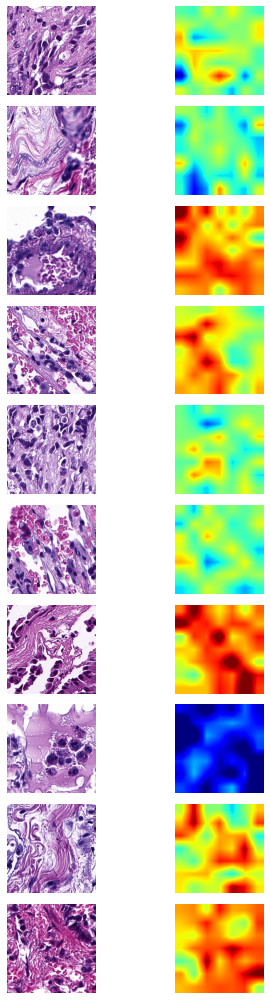

In [212]:

plot_10_tiles(best_normal, Min, Max)

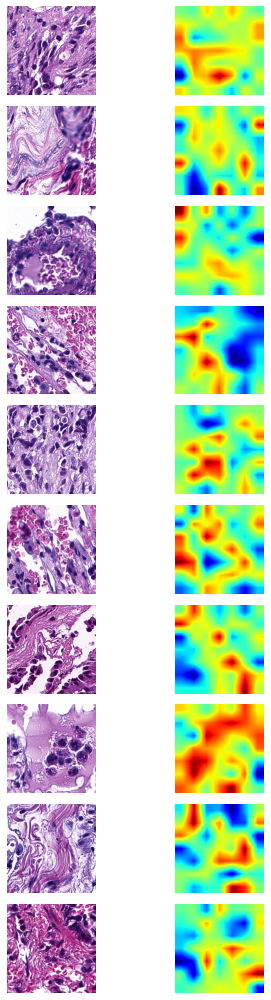

In [213]:
plot_10_tiles(best_normal, Min, Max, False)

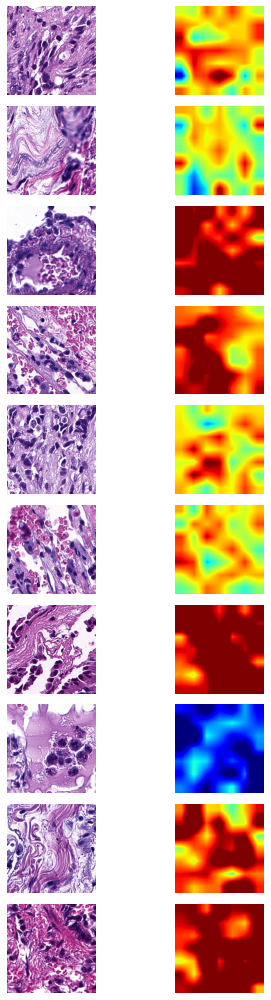

In [214]:
plot_10_tiles(best_normal, Min, Q95)

## Less discriminant

In [295]:
less_discriminant = df_all_499_test[(df_all_499_test['Sample'] == 'Tumor')
                                    &  (df_all_499_test['PredLabel'] == 'Tumor')]
less_discriminant = less_discriminant.sort_values(by = 'Max/Loss', ascending=False)
less_discriminant.head()

Path2Image Sample          Loss  \
4030  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -49078.649414   
2836  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -46374.085938   
3056  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -50685.497070   
2983  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -49504.936523   
2897  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -50301.483398   

      MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID       MSE  \
4030         -0.602702        -0.567692    499  Test  TNE0002  0.000013   
2836         -0.569914        -0.536411    499  Test  TNE0034  0.001217   
3056         -0.623319        -0.586320    499  Test  TNE0803  0.000225   
2983         -0.610112        -0.572689    499  Test  TNE0803  0.000002   
2897         -0.606425        -0.581923    499  Test  TNE0803  0.000113   

      Binary_label  loss_normal  Max/Loss PredLabel  
4030             0     0.439897 -0.000012     Tumor  
2836             0     0.586810 -0.000012     Tumor  
3056             0     0.352613 -0.000012     Tumor  
2983             0     0.416741 -0.000012     Tumor  
2897             0     0.373472 -0.000012     Tumor

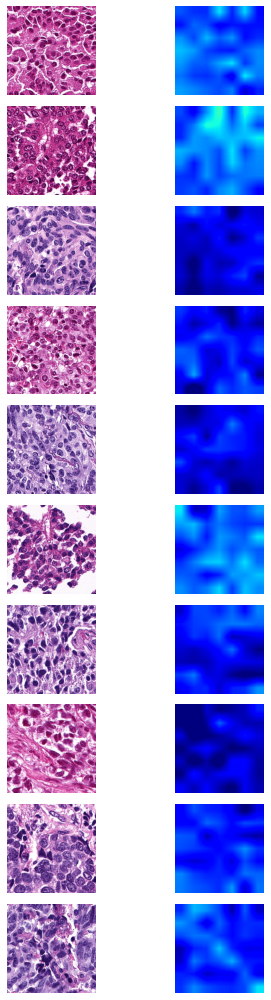

In [296]:

plot_10_tiles(less_discriminant, Min, Max)

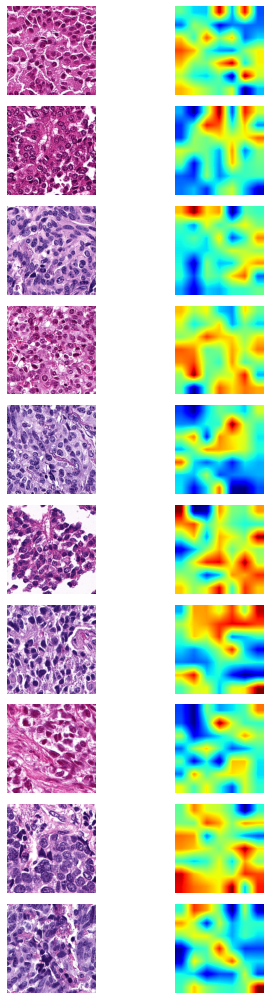

In [297]:
plot_10_tiles(less_discriminant, Min, Max, False)

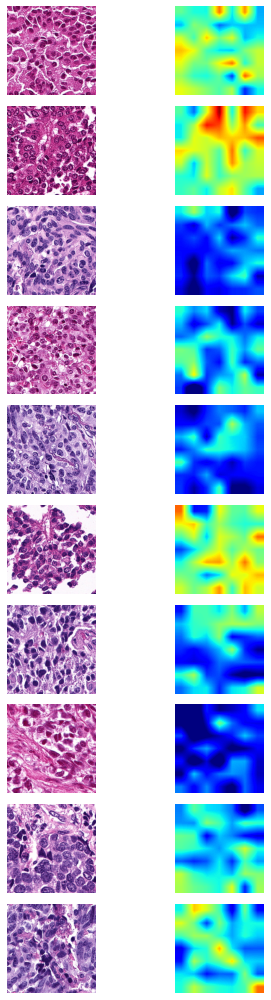

In [298]:
plot_10_tiles(less_discriminant,  Min, Q95)

In [299]:
df_all_499_test.head()

Path2Image  Sample          Loss  \
1518  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1767  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
445   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
1855  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
98    /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

      MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID       MSE  \
1518         -0.563197        -0.495072    499  Test  TNE1417  0.005811   
1767         -0.548285        -0.503347    499  Test  TNE1417  0.004618   
445          -0.587729        -0.504280    499  Test  TNE1011  0.004492   
1855         -0.544216        -0.505963    499  Test  TNE1417  0.004269   
98           -0.563386        -0.506407    499  Test  TNE0869  0.004212   

      Binary_label  loss_normal  Max/Loss PredLabel  
1518             1     0.106198 -0.000009    Normal  
1767             1     0.271839 -0.000010    Normal  
445              1     0.685204 -0.000011    Normal  
1855             1     0.351664 -0.000010    Normal  
98               1     0.436979 -0.000010    Normal

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='Max/Loss', ylabel='Density'>

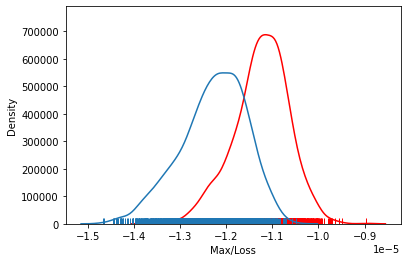

In [215]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['Max/Loss'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['Max/Loss'], hist=False, rug=True)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='Loss', ylabel='Density'>

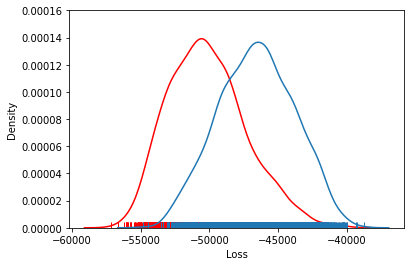

In [216]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['Loss'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['Loss'], hist=False, rug=True)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='MaxAnomalyScore', ylabel='Density'>

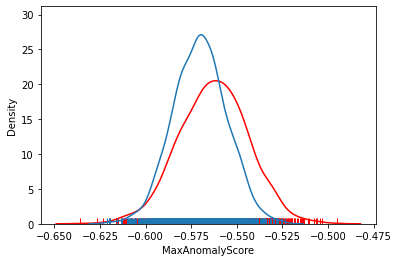

In [217]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['MaxAnomalyScore'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxAnomalyScore'], hist=False, rug=True)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='MeanAnomalyScore', ylabel='Density'>

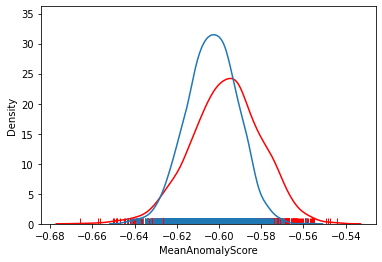

In [218]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['MeanAnomalyScore'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanAnomalyScore'], hist=False, rug=True)

### Load all the images 

In [219]:
df_all_499_train.head()

Path2Image Sample          Loss  \
6106  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -49708.654297   
5987  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -43189.316406   
6567  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -50329.349609   
6637  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -50238.812500   
2457  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Tumor -50475.345215   

      MeanAnomalyScore  MaxAnomalyScore  Epoch    Set    TNEID           MSE  \
6106         -0.577360        -0.434405    499  Train  TNE1356  3.807628e+06   
5987         -0.573538        -0.516275    499  Train  TNE1356  2.086684e+07   
6567         -0.577961        -0.518194    499  Train  TNE0404  6.615234e+06   
6637         -0.573474        -0.520054    499  Train  TNE0404  6.157707e+06   
2457         -0.558997        -0.520911    499  Train  TNE2158  7.387553e+06   

      Binary_label  
6106             0  
5987             0  
6567             0  
6637             0  
2457             0

In [220]:
df_all_499_train.iloc[0,0]

'/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1356/Tumor/TNE1356_20353_56449.jpg'

In [221]:
var = 'MeanAnomalyScore'
df_all_499_train = df_all_499[df_all_499['Set'] == 'Train']
Q05 = df_all_499_train[var].quantile(0.05)
Q1 = df_all_499_train[var].quantile(0.1)
Q2 = df_all_499_train[var].quantile(0.2)
Min  = df_all_499_train[var].min()
Q5 = df_all_499_train[var].quantile(0.5)
Q8 = df_all_499_train[var].quantile(0.8)
Q9 = df_all_499_train[var].quantile(0.9)
Q95 = df_all_499_train[var].quantile(0.95)
Max  = df_all_499_train[var].max()


In [222]:
root_to_anom_map = '/gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/TumorNormal_MAE_DEV_epoch_499'
AnomMap = []
Labels = []
imgName = []
for folder in ['Normal', 'Tumor']:
    list_anom_map = os.listdir(os.path.join(root_to_anom_map, folder))
    for anom_map_name in list_anom_map:
        imgName.append(os.path.join(
            root_to_anom_map, folder,anom_map_name))
        anom_map_c = np.load(os.path.join(
            root_to_anom_map, folder,anom_map_name),  allow_pickle=True)
        AnomMap.append(anom_map_c)
        Labels.append(folder)
AnomMap = np.array(AnomMap)

In [223]:
AnomMap[0].max()

-0.5759282

In [224]:
root_to_anom_map = '/gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/TumorNormal_MAE_train_epoch_499'

AnomMap_tr = []
Labels_tr = []
imgName_tr = []
q05_l = []
q10_l = []
q20_l = []
q50_l = []
q80_l = []
q90_l = []
q95_l = []
tneid = []
for folder in [ 'Tumor']:
    list_anom_map = os.listdir(os.path.join(root_to_anom_map, folder))
    for anom_map_name in list_anom_map:
        imgName_tr.append(os.path.join(
            root_to_anom_map, folder,anom_map_name))
        anom_map_c = np.load(os.path.join(
            root_to_anom_map, folder,anom_map_name),  allow_pickle=True)
        q05_l.append(np.quantile(anom_map_c, 0.5))
        q10_l.append(np.quantile(anom_map_c, 0.10))
        q20_l.append(np.quantile(anom_map_c, 0.20))
        q50_l.append(np.quantile(anom_map_c, 0.50))
        q80_l.append(np.quantile(anom_map_c, 0.80))
        q90_l.append(np.quantile(anom_map_c, 0.90))
        q95_l.append(np.quantile(anom_map_c, 0.95))
        AnomMap_tr.append(anom_map_c)
        tneid.append(anom_map_name[:7])
        Labels_tr.append(folder)
        

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated functi

<Figure size 432x288 with 0 Axes>

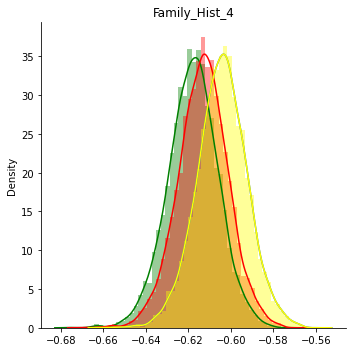

In [225]:
# plt.figure(figsize=(15,8))
# ax =sns.displot(q05_l, kind="kde")
# sns.displot(q10_l, kind="kde", ax = ax)
# sns.displot(q20_l, kind="kde", ax = ax)

# plt.legend() 


plt.figure()
sns.displot(q05_l, kind="kde")
sns.distplot(q10_l, color = 'green')
sns.distplot(q20_l, color = 'red')
sns.distplot(q50_l, color = 'yellow')

plt.title('Family_Hist_4')

plt.tight_layout()
plt.show()

In [226]:
df_train_quantile = pd.DataFrame()
df_train_quantile['tneid'] = tneid
df_train_quantile['q05'] = q05_l
df_train_quantile['q10'] = q10_l
df_train_quantile['q20'] = q20_l
df_train_quantile['q50'] = q50_l
df_train_quantile['q80'] = q80_l
df_train_quantile['q90'] = q90_l
df_train_quantile['q95'] = q95_l



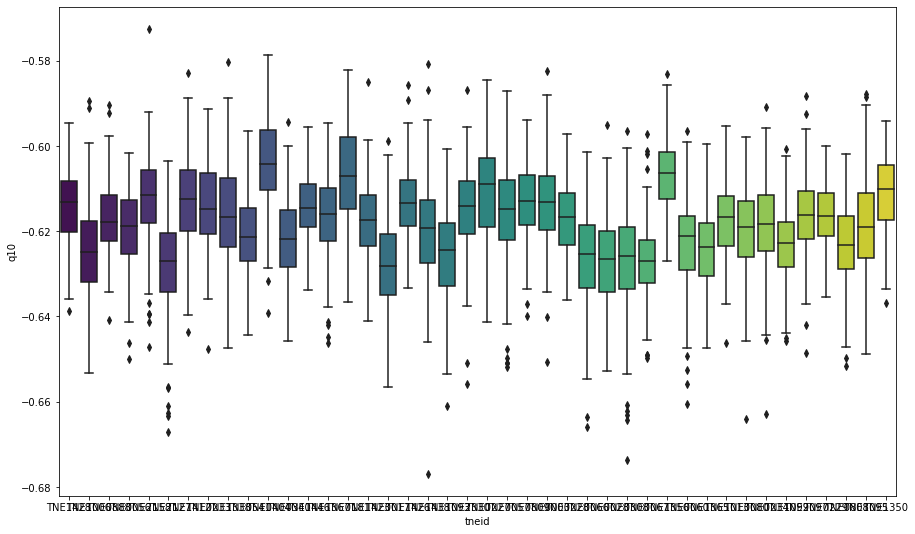

In [227]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_train_quantile['tneid'], y=df_train_quantile['q10'], palette= 'viridis')


In [228]:
AnomMap_tr = np.array(AnomMap_tr)

In [232]:
Q05_m =  np.median(np.array(q05_l))
Q10_m =  np.median(np.array(q10_l))
Q20_m =  np.median(np.array(q20_l))
Q50_m =  np.median(np.array(q50_l))
Q80_m =  np.median(np.array(q80_l))
Q90_m =  np.median(np.array(q90_l))
Q95_m =  np.median(np.array(q95_l))

In [233]:
print( Q05_m, Q10_m, Q20_m, Q50_m, Q80_m, Q90_m,  Q95_m)

-0.6041200160980225 -0.6175902485847473 -0.6129383444786072 -0.6041200160980225 -0.5953163504600525 -0.5907269716262817 -0.5867533087730408


In [234]:
p_px_q05 = []
p_px_q10 = []
p_px_q20 = []
p_px_q50 = []
p_px_q80 = []
p_px_q90 = []
p_px_q95 = []
tneid = []
for i in range(AnomMap_tr.shape[0]):
    AnomMap_c = AnomMap_tr[i]
    #print(AnomMap_c, (AnomMap_c < Q05))
    p_px_q05.append((AnomMap_c < Q05_m).sum() / (224**2))
    p_px_q10.append((AnomMap_c < Q10_m).sum() / (224**2))
    p_px_q20.append((AnomMap_c < Q20_m).sum() / (224**2))
    p_px_q50.append((AnomMap_c > Q50_m).sum() / (224**2))
    p_px_q80.append((AnomMap_c > Q80_m).sum() / (224**2))
    p_px_q90.append((AnomMap_c > Q90_m).sum() / (224**2))
    p_px_q95.append((AnomMap_c > Q95_m).sum() / (224**2))
    tneid.append( df_train_quantile['tneid'][i])
   

In [235]:
df_prrop_train = pd.DataFrame()
df_prrop_train['tneid'] = tneid
df_prrop_train['p_px_q05'] = p_px_q05
df_prrop_train['p_px_q10'] = p_px_q10
df_prrop_train['p_px_q20'] = p_px_q20
df_prrop_train['p_px_q50'] = p_px_q50
df_prrop_train['p_px_q80'] = p_px_q80
df_prrop_train['p_px_q90'] = p_px_q90
df_prrop_train['p_px_q95'] = p_px_q95


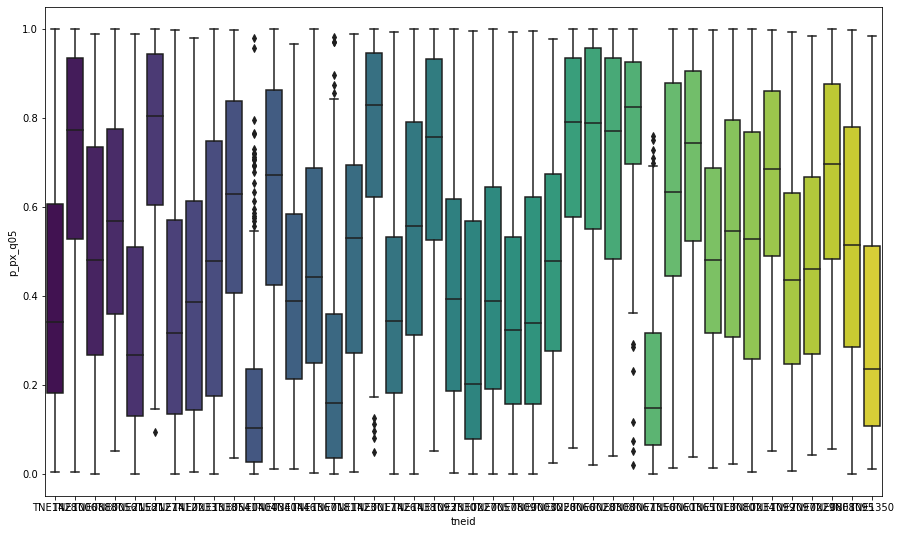

In [236]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prrop_train['tneid'], y=df_prrop_train['p_px_q05'], palette= 'viridis')


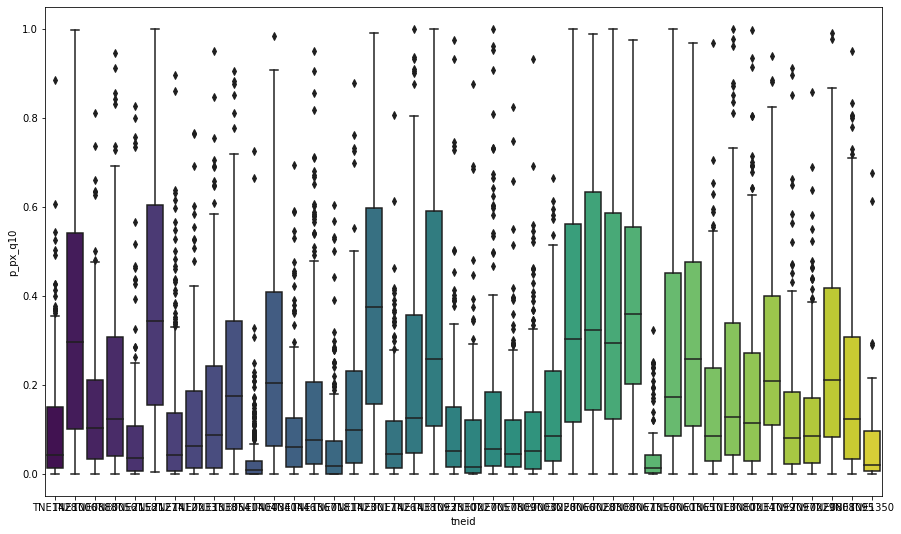

In [237]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prrop_train['tneid'], y=df_prrop_train['p_px_q10'], palette= 'viridis')


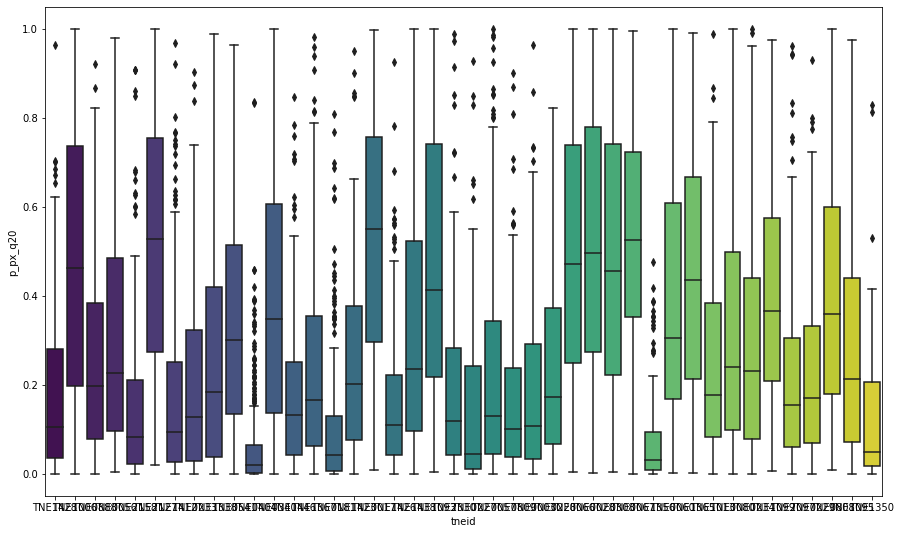

In [238]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prrop_train['tneid'], y=df_prrop_train['p_px_q20'], palette= 'viridis')

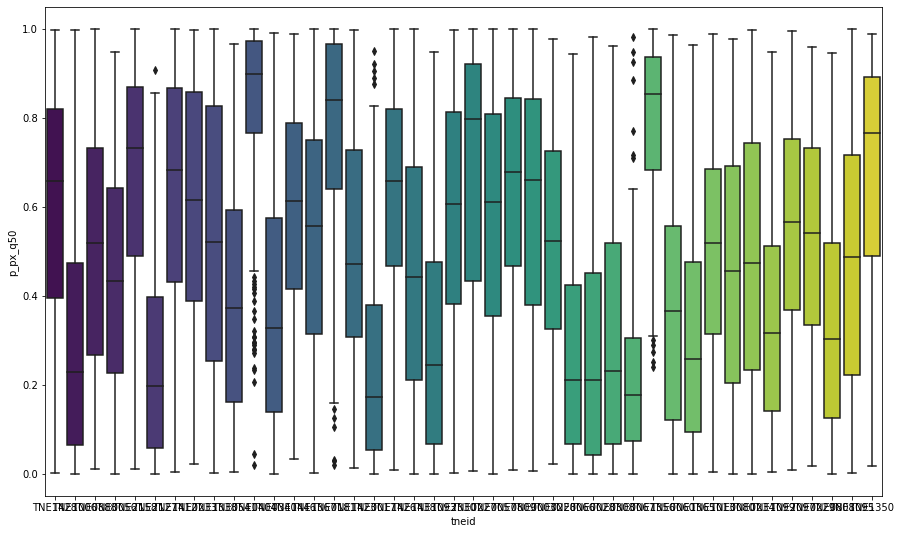

In [239]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prrop_train['tneid'], y=df_prrop_train['p_px_q50'], palette= 'viridis')

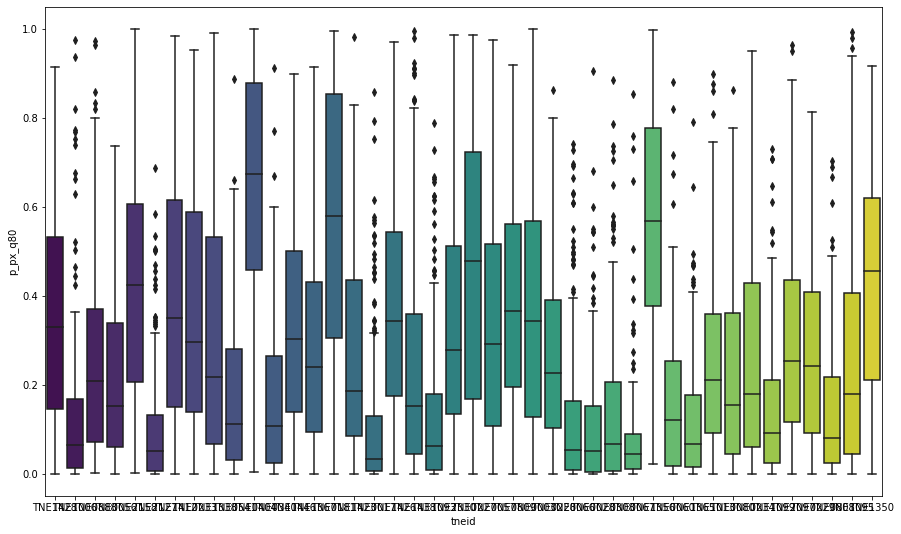

In [240]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prrop_train['tneid'], y=df_prrop_train['p_px_q80'], palette= 'viridis')

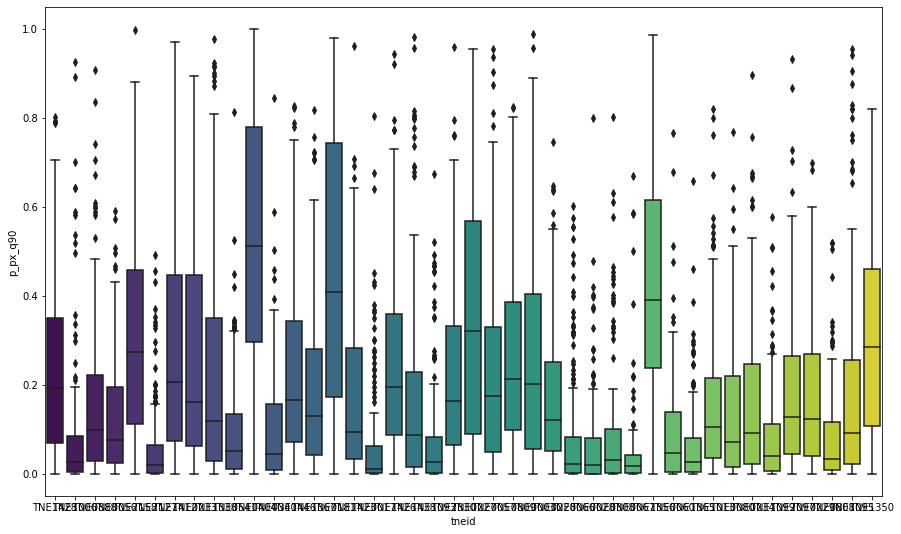

In [241]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prrop_train['tneid'], y=df_prrop_train['p_px_q90'], palette= 'viridis')

In [242]:
AnomMap.shape

(4142, 224, 224)

In [243]:
AnomMap_tr.shape

(7573, 224, 224)

In [308]:
p_px_q05 = []
p_px_q1 = []
p_px_q2 = []
p_px_q5 = []
p_px_q8 = []
p_px_q9 = []
p_px_q95 = []
for i in range(AnomMap.shape[0]):
    AnomMap_c = AnomMap[i]

    p_px_q05.append(((AnomMap_c < Q05_m).sum() / (224**2)))
    p_px_q1.append( ((AnomMap_c < Q10_m).sum() / (224**2)))
    p_px_q2.append(  ((AnomMap_c < Q20_m).sum() / (224**2)))
    p_px_q5.append(   ((AnomMap_c > Q50_m).sum() / (224**2)))
    p_px_q8.append( ((AnomMap_c > Q80_m).sum() / (224**2)))
    p_px_q9.append( ((AnomMap_c > Q90_m).sum() / (224**2)))
    p_px_q95.append(  ((AnomMap_c > Q95_m).sum() / (224**2)))
    


In [309]:
df_prop = pd.DataFrame()
df_prop['Labels']  = Labels
df_prop['imgName']  = imgName
df_prop['p_px_q05']  = p_px_q05
df_prop['p_px_q1']  = p_px_q1
df_prop['p_px_q2']  = p_px_q2
df_prop['p_px_q5']  = p_px_q5
df_prop['p_px_q8']  = p_px_q8
df_prop['p_px_q9']  = p_px_q9
df_prop['p_px_q95']  =p_px_q95

df_prop.head()

Labels                                            imgName  p_px_q05  \
0  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.618742   
1  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.085300   
2  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.904397   
3  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.462970   
4  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.003368   

    p_px_q1   p_px_q2   p_px_q5   p_px_q8   p_px_q9  p_px_q95  
0  0.188158  0.306621  0.381238  0.136619  0.066486  0.030293  
1  0.031928  0.043925  0.914680  0.821269  0.719129  0.629703  
2  0.597935  0.754006  0.095603  0.027922  0.016203  0.010244  
3  0.105110  0.211715  0.537030  0.196927  0.063935  0.019073  
4  0.000000  0.000159  0.996632  0.951730  0.914102  0.864198

In [310]:
df_prop['imgName'][0]

'/gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/TumorNormal_MAE_DEV_epoch_499/Normal/TNE1011_11521_33025.npy'

In [311]:

df_prop.shape # ['imgName'][0]

(4142, 9)

In [312]:
df_all_499_test.shape

(3733, 44)

In [313]:
df_all_499_test['Path2Image'][0]

'/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1417/Normal/TNE1417_9601_31489.jpg'

In [314]:
df_all_499_test['Path2Image'][0]
#print(df_all_499_test.shape)

'/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1417/Normal/TNE1417_9601_31489.jpg'

In [315]:
df_prop['imgName'][0]#.split('TNE')

'/gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/TumorNormal_MAE_DEV_epoch_499/Normal/TNE1011_11521_33025.npy'

In [316]:
len('/gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/TumorNormal_MAE_DEV_epoch_499')

72

In [317]:
imgName2 = []
for i in range(df_prop.shape[0]):
    
    tneid = 'TNE' + df_prop['imgName'][i].split('TNE')[1][:4]
    imgName2.append('/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/'+  tneid + df_prop['imgName'][i][72:-3]+'jpg')
df_prop['imgName2'] = imgName2

In [318]:
df_prop.head()

Labels                                            imgName  p_px_q05  \
0  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.618742   
1  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.085300   
2  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.904397   
3  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.462970   
4  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.003368   

    p_px_q1   p_px_q2   p_px_q5   p_px_q8   p_px_q9  p_px_q95  \
0  0.188158  0.306621  0.381238  0.136619  0.066486  0.030293   
1  0.031928  0.043925  0.914680  0.821269  0.719129  0.629703   
2  0.597935  0.754006  0.095603  0.027922  0.016203  0.010244   
3  0.105110  0.211715  0.537030  0.196927  0.063935  0.019073   
4  0.000000  0.000159  0.996632  0.951730  0.914102  0.864198   

                                            imgName2  
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...

In [319]:
print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q05']  ))
print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q1']))
print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q2']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q5']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q8']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q9']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q95'] ))
#print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q95']  / df_prop['p_px_q5']))




0.639949645523264
0.6236769331893517
0.6322074980046011
0.639949293394056
0.643074557490962
0.6435817409268041
0.6435831494436359


In [320]:
df_all_499_test.head()

Path2Image  Sample          Loss  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

   MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID           MSE  \
0         -0.563197        -0.495072    499  Test  TNE1417  5.571862e+07   
1         -0.548285        -0.503347    499  Test  TNE1417  1.949353e+07   
2         -0.587729        -0.504280    499  Test  TNE1011  1.020556e+07   
3         -0.544216        -0.505963    499  Test  TNE1417  8.676741e+06   
4         -0.563386        -0.506407    499  Test  TNE0869  1.890727e+06   

   Binary_label  ...  Labels  \
0             1  ...  Normal   
1             1  ...  Normal   
2             1  ...  Normal   
3             1  ...  Normal   
4             1  ...  Normal   

                                             imgName p_px_q05 p_px_q1 p_px_q2  \
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...      104       0       4   
1  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...        0       0       0   
2  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...      738       0       0   
3  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...        0       0       0   
4  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...      134       0       0   

   p_px_q5  p_px_q8  p_px_q9  p_px_q95  \
0    50072    49785    49445     48952   
1    50176    50176    50176     50176   
2    49438    44203    36436     28172   
3    50176    50176    50176     50176   
4    50042    49233    48086     46508   

                                            imgName2  
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  

[5 rows x 44 columns]

In [327]:
df_all_499_test = df_all_499_test.merge( df_prop, left_on = 'Path2Image', right_on = 'imgName2' )

In [328]:
df_all_499_test.head()

Path2Image  Sample          Loss  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

   MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID           MSE  \
0         -0.563197        -0.495072    499  Test  TNE1417  5.571862e+07   
1         -0.548285        -0.503347    499  Test  TNE1417  1.949353e+07   
2         -0.587729        -0.504280    499  Test  TNE1011  1.020556e+07   
3         -0.544216        -0.505963    499  Test  TNE1417  8.676741e+06   
4         -0.563386        -0.506407    499  Test  TNE0869  1.890727e+06   

   Binary_label  ...  Labels  \
0             1  ...  Normal   
1             1  ...  Normal   
2             1  ...  Normal   
3             1  ...  Normal   
4             1  ...  Normal   

                                             imgName  p_px_q05 p_px_q1  \
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.002073     0.0   
1  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.000000     0.0   
2  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.014708     0.0   
3  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.000000     0.0   
4  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.002671     0.0   

   p_px_q2   p_px_q5   p_px_q8   p_px_q9  p_px_q95  \
0  0.00008  0.997927  0.992207  0.985431  0.975606   
1  0.00000  1.000000  1.000000  1.000000  1.000000   
2  0.00000  0.985292  0.880959  0.726164  0.561464   
3  0.00000  1.000000  1.000000  1.000000  1.000000   
4  0.00000  0.997329  0.981206  0.958347  0.926897   

                                            imgName2  
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  

[5 rows x 64 columns]

In [329]:
df_all_499_test['loss_norm']= (df_all_499_test['Loss'] - df_all_499_test['Loss'].min()) /(df_all_499_test['Loss'].min() - df_all_499_test['Loss'].max())

In [330]:
df_all_499_test.head()

Path2Image  Sample          Loss  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

   MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID           MSE  \
0         -0.563197        -0.495072    499  Test  TNE1417  5.571862e+07   
1         -0.548285        -0.503347    499  Test  TNE1417  1.949353e+07   
2         -0.587729        -0.504280    499  Test  TNE1011  1.020556e+07   
3         -0.544216        -0.505963    499  Test  TNE1417  8.676741e+06   
4         -0.563386        -0.506407    499  Test  TNE0869  1.890727e+06   

   Binary_label  ...  Labels  \
0             1  ...  Normal   
1             1  ...  Normal   
2             1  ...  Normal   
3             1  ...  Normal   
4             1  ...  Normal   

                                             imgName  p_px_q05 p_px_q1  \
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.002073     0.0   
1  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.000000     0.0   
2  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.014708     0.0   
3  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.000000     0.0   
4  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.002671     0.0   

   p_px_q2   p_px_q5   p_px_q8   p_px_q9  p_px_q95  \
0  0.00008  0.997927  0.992207  0.985431  0.975606   
1  0.00000  1.000000  1.000000  1.000000  1.000000   
2  0.00000  0.985292  0.880959  0.726164  0.561464   
3  0.00000  1.000000  1.000000  1.000000  1.000000   
4  0.00000  0.997329  0.981206  0.958347  0.926897   

                                            imgName2  
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  

[5 rows x 64 columns]

In [342]:
 df_all_499_test['p_px_q9'].min()

0.0

In [343]:
 df_all_499_test['p_px_q9'].max()

1.0

In [337]:
print(roc_auc_score(df_all_499_test['Binary_label'], df_all_499_test['p_px_q05']))
print(roc_auc_score(df_all_499_test['Binary_label'], df_all_499_test['p_px_q1'] ))
print(roc_auc_score(df_all_499_test['Binary_label'], df_all_499_test['p_px_q2']  ))
print(roc_auc_score(df_all_499_test['Binary_label'], df_all_499_test['p_px_q5']  + df_all_499_test['loss_norm'] ) )
print(roc_auc_score(df_all_499_test['Binary_label'], df_all_499_test['p_px_q8'] + df_all_499_test['loss_norm'] ))
print(roc_auc_score(df_all_499_test['Binary_label'], df_all_499_test['p_px_q9']   ))
print(roc_auc_score(df_all_499_test['Binary_label'], df_all_499_test['p_px_q9']  * df_all_499_test['loss_norm']  ))
print(1- roc_auc_score(df_all_499_test['Binary_label'], df_all_499_test['Loss']))
print( roc_auc_score(df_all_499_test['Binary_label'], df_all_499_test['loss_norm']))

0.3682070109636469
0.3836507501442586
0.37550634737449506
0.776499422965955
0.7940718407386035
0.6345796306982112
0.4482701961915753
0.8136319965377957
0.8136319965377957


/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='p_px_q05', ylabel='Density'>

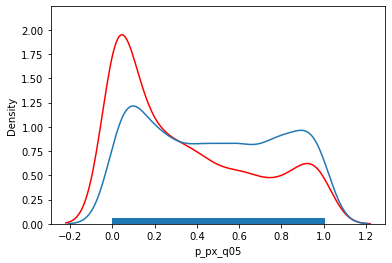

In [268]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['p_px_q05'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['p_px_q05'], hist=False, rug=True)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='p_px_q1', ylabel='Density'>

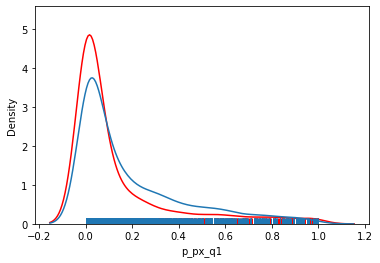

In [269]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['p_px_q1'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['p_px_q1'], hist=False, rug=True)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='p_px_q2', ylabel='Density'>

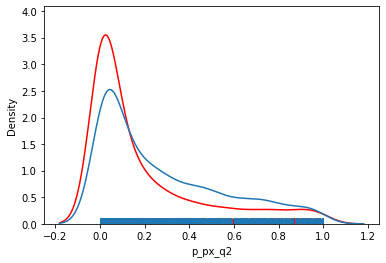

In [270]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['p_px_q2'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['p_px_q2'], hist=False, rug=True)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='p_px_q8', ylabel='Density'>

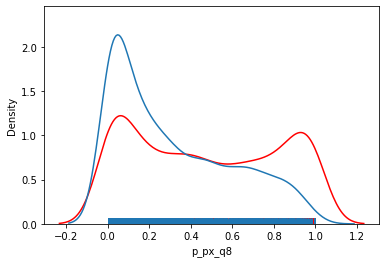

In [334]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['p_px_q8'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['p_px_q8'], hist=False, rug=True)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='p_px_q9', ylabel='Density'>

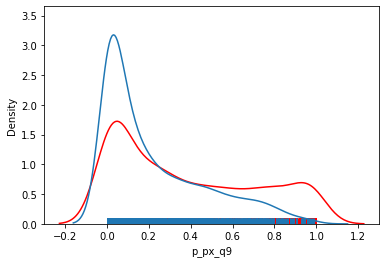

In [272]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['p_px_q9'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['p_px_q9'], hist=False, rug=True)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='loss_norm', ylabel='Density'>

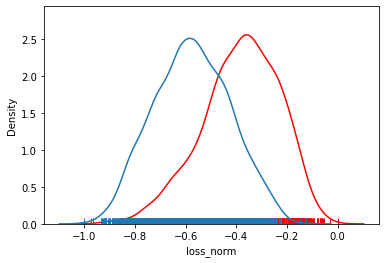

In [333]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['loss_norm'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['loss_norm'], hist=False, rug=True)

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/pytorch-gpu-1.10.1+py3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

<AxesSubplot:xlabel='p_px_q95', ylabel='Density'>

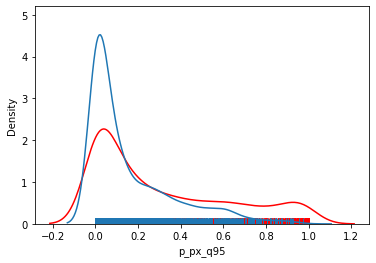

In [273]:
dfNorm = df_all_499_test.loc[df_all_499_test['Sample'] == 'Normal']
dfTumor = df_all_499_test.loc[df_all_499_test['Sample'] == 'Tumor']
sns.distplot(dfNorm['p_px_q95'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['p_px_q95'], hist=False, rug=True)

In [144]:
df_all_499_test.shape

(3733, 14)

In [145]:
df_prop.head()

Labels                                            imgName  p_px_q05  \
0  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.043233   
1  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.007636   
2  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.130073   
3  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.021057   
4  Normal  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  0.000000   

    p_px_q1   p_px_q2   p_px_q5   p_px_q8   p_px_q9  p_px_q95  \
0  0.062534  0.102281  0.132284  0.047709  0.022651  0.010173   
1  0.010600  0.014682  0.311639  0.280450  0.244785  0.214240   
2  0.199198  0.254632  0.033095  0.009644  0.005514  0.003486   
3  0.034383  0.070726  0.184760  0.069248  0.021817  0.006477   
4  0.000000  0.000054  0.339220  0.324239  0.311096  0.294027   

                   img_def             tiles_id  
0  TNE1011_11521_33025.jpg  TNE1011_11521_33025  
1  TNE1417_10369_35713.jpg  TNE1417_10369_35713  
2  TNE1011_19201_24193.jpg  TNE1011_19201_24193  
3  TNE0803_14209_16897.jpg  TNE0803_14209_16897  
4   TNE0803_8833_47233.jpg   TNE0803_8833_47233

In [146]:
tiles_id_df_all_499_test = []
tiles_id_df_prop = []
for i in range(df_prop.shape[0]):
    tiles_id_df_prop.append(df_prop.iloc[i,1].split('/')[-1].split('.')[0])

In [147]:
df_prop['tiles_id'] = tiles_id_df_prop

In [148]:
tiles_id_df_all_499_test = []
tiles_id_df_prop = []
for i in range(df_all_499_test.shape[0]):
    tiles_id_df_all_499_test.append(df_all_499_test.iloc[i,0].split('/')[-1].split('.')[0])
df_all_499_test['tiles_id'] =  tiles_id_df_all_499_test

In [149]:

df_all_499_test.iloc[i,0].split('/')

['',
 'gpfsscratch',
 'rech',
 'ohv',
 'ueu39kt',
 'TumoralNormalForFastFlow_Vahadane',
 'TNE0803',
 'Normal',
 'TNE0803_5761_33409.jpg']

In [150]:
df_all_499_test.head()

Path2Image  Sample          Loss  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

   MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID       MSE  \
0         -0.563197        -0.495072    499  Test  TNE1417  0.005811   
1         -0.548285        -0.503347    499  Test  TNE1417  0.004618   
2         -0.587729        -0.504280    499  Test  TNE1011  0.004492   
3         -0.544216        -0.505963    499  Test  TNE1417  0.004269   
4         -0.563386        -0.506407    499  Test  TNE0869  0.004212   

   Binary_label  Max/Loss PredLabel                  img_def  \
0             0  0.000009    Normal   TNE1417_9601_31489.jpg   
1             0  0.000010    Normal   TNE1417_9601_32641.jpg   
2             0  0.000011    Normal  TNE1011_11521_32257.jpg   
3             0  0.000010    Normal   TNE1417_9985_32257.jpg   
4             0  0.000010    Normal  TNE0869_22273_17281.jpg   

              tiles_id  
0   TNE1417_9601_31489  
1   TNE1417_9601_32641  
2  TNE1011_11521_32257  
3   TNE1417_9985_32257  
4  TNE0869_22273_17281

In [151]:
tiles_id_df_all_499_test

['TNE1417_9601_31489',
 'TNE1417_9601_32641',
 'TNE1011_11521_32257',
 'TNE1417_9985_32257',
 'TNE0869_22273_17281',
 'TNE0803_4609_34945',
 'TNE1417_16897_54145',
 'TNE1417_13057_36481',
 'TNE1417_17665_54913',
 'TNE1417_13825_23425',
 'TNE1417_10369_33793',
 'TNE1417_10369_34177',
 'TNE1417_10369_32641',
 'TNE1681_5761_40321',
 'TNE1681_6145_54913',
 'TNE1417_17281_55297',
 'TNE1417_18049_55297',
 'TNE0001_11137_43393',
 'TNE1417_11905_34177',
 'TNE1417_9985_35329',
 'TNE1417_9985_34561',
 'TNE1417_10369_34945',
 'TNE1417_10369_31105',
 'TNE1681_4609_45697',
 'TNE1417_10753_33409',
 'TNE1417_17665_48769',
 'TNE1417_9985_38017',
 'TNE1417_9217_36097',
 'TNE1417_13825_38785',
 'TNE0002_25345_18049',
 'TNE1417_17665_59137',
 'TNE1417_11905_34945',
 'TNE0001_9985_23425',
 'TNE0869_16129_18049',
 'TNE0869_18433_13441',
 'TNE1417_11137_31489',
 'TNE1417_13057_37249',
 'TNE0034_12289_14209',
 'TNE1417_16897_61441',
 'TNE0034_15745_15745',
 'TNE0001_25345_48385',
 'TNE1417_17281_62593',
 'TN

In [152]:
df_test_alll_metrics = pd.merge(
    df_all_499_test,
    df_prop,
    how="inner",
    on='tiles_id',
 )

In [153]:
df_test_alll_metrics.head()

Path2Image  Sample          Loss  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

   MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID       MSE  \
0         -0.563197        -0.495072    499  Test  TNE1417  0.005811   
1         -0.548285        -0.503347    499  Test  TNE1417  0.004618   
2         -0.587729        -0.504280    499  Test  TNE1011  0.004492   
3         -0.544216        -0.505963    499  Test  TNE1417  0.004269   
4         -0.563386        -0.506407    499  Test  TNE0869  0.004212   

   Binary_label  ...  Labels  \
0             0  ...  Normal   
1             0  ...  Normal   
2             0  ...  Normal   
3             0  ...  Normal   
4             0  ...  Normal   

                                             imgName p_px_q05 p_px_q1  \
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...      0.0     0.0   
1  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...      0.0     0.0   
2  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...      0.0     0.0   
3  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...      0.0     0.0   
4  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...      0.0     0.0   

    p_px_q2   p_px_q5   p_px_q8   p_px_q9  p_px_q95                img_def_y  
0  0.000027  0.339600  0.337667  0.335341  0.331950   TNE1417_9601_31489.jpg  
1  0.000000  0.340278  0.340278  0.340278  0.340278   TNE1417_9601_32641.jpg  
2  0.000000  0.335341  0.300795  0.247206  0.190972  TNE1011_11521_32257.jpg  
3  0.000000  0.340278  0.340278  0.340278  0.340278   TNE1417_9985_32257.jpg  
4  0.000000  0.339383  0.333984  0.326131  0.315389  TNE0869_22273_17281.jpg  

[5 rows x 24 columns]

In [154]:
print('p_px_q05', roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['p_px_q05']))
print('p_px_q1', roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['p_px_q1']))
print('p_px_q2', roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['p_px_q2']))
print('p_px_q5', roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['p_px_q5']))
print('p_px_q8', roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['p_px_q8']))
print('p_px_q9', roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['p_px_q9']))
# print('p_px_q95', roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['p_px_q95'] ))
# print(roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['p_px_q95'] 
#                     / df_test_alll_metrics['p_px_q5']))


print('MaxAnomalyScore', roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['MaxAnomalyScore']))
print('MaxAnomalyScore + p_px_q05', roc_auc_score(df_test_alll_metrics['Binary_label'],
                    df_test_alll_metrics['MaxAnomalyScore'] + df_test_alll_metrics['p_px_q05'] ))

print('MaxAnomalyScore + p_px_q1', roc_auc_score(df_test_alll_metrics['Binary_label'],
                    df_test_alll_metrics['MaxAnomalyScore'] + df_test_alll_metrics['p_px_q1'] ))

print('MaxAnomalyScore + p_px_q2', roc_auc_score(df_test_alll_metrics['Binary_label'],
                    df_test_alll_metrics['MaxAnomalyScore'] + df_test_alll_metrics['p_px_q2'] ))

print('MaxAnomalyScore + p_px_q8', roc_auc_score(df_test_alll_metrics['Binary_label'],
         df_test_alll_metrics['MaxAnomalyScore'] + df_test_alll_metrics['p_px_q8'] ))


# print('MaxAnomalyScore + p_px_q95', roc_auc_score(df_test_alll_metrics['Binary_label'],           
#            df_test_alll_metrics['MaxAnomalyScore'] + df_test_alll_metrics['p_px_q95'] ))



print('MeanAnomalyScore', roc_auc_score(df_test_alll_metrics['Binary_label'], df_test_alll_metrics['MeanAnomalyScore']))
print('MeanAnomalyScore + p_px_q05', roc_auc_score(df_test_alll_metrics['Binary_label'],
                    df_test_alll_metrics['MeanAnomalyScore'] + df_test_alll_metrics['p_px_q05'] ))

print('MeanAnomalyScore + p_px_q1', roc_auc_score(df_test_alll_metrics['Binary_label'],
                    df_test_alll_metrics['MeanAnomalyScore'] + df_test_alll_metrics['p_px_q1'] ))

print('MeanAnomalyScore + p_px_q2', roc_auc_score(df_test_alll_metrics['Binary_label'],
                    df_test_alll_metrics['MeanAnomalyScore'] + df_test_alll_metrics['p_px_q2'] ))

print('MeanAnomalyScore + p_px_q8', roc_auc_score(df_test_alll_metrics['Binary_label'],
         df_test_alll_metrics['MeanAnomalyScore'] + df_test_alll_metrics['p_px_q8'] ))

# print('MeanAnomalyScore + p_px_q95', roc_auc_score(df_test_alll_metrics['Binary_label'],           
#            df_test_alll_metrics['MeanAnomalyScore'] + df_test_alll_metrics['p_px_q95'] ))



p_px_q05 0.6079156087709175
p_px_q1 0.6154750432775533
p_px_q2 0.6241798903635315
p_px_q5 0.3683626658972879
p_px_q8 0.3655516445470283
p_px_q9 0.3654231102135026
MaxAnomalyScore 0.37446407963069817
MaxAnomalyScore + p_px_q05 0.4921393537218696
MaxAnomalyScore + p_px_q1 0.5299567224466244
MaxAnomalyScore + p_px_q2 0.567133871898442
MaxAnomalyScore + p_px_q8 0.36269042123485284
MeanAnomalyScore 0.37077712060011536
MeanAnomalyScore + p_px_q05 0.49315810732833243
MeanAnomalyScore + p_px_q1 0.5319945181765724
MeanAnomalyScore + p_px_q2 0.5708450663589152
MeanAnomalyScore + p_px_q8 0.3643635314483555


### Load MAE vector

In [155]:
root_to_mae_v = '/gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/TumorNormal_MAE_DEV_epoch_499/MAE_vectors'
mae_df = pd.DataFrame()
Labels = []
imgName = []
for folder in ['Normal', 'Tumor']:
    list_anom_map = os.listdir(os.path.join(root_to_mae_v, folder))
    for anom_map_name in list_anom_map:
        imgName.append(os.path.join(
            root_to_mae_v, folder,anom_map_name))
        mae_v_c = np.load(os.path.join(
            root_to_mae_v, folder,anom_map_name),  allow_pickle=True)
        df_c = pd.DataFrame(mae_v_c)
        df_c = df_c.T
        df_c['ImgName'] = os.path.join(   root_to_mae_v, folder,anom_map_name)
        mae_df = mae_df.append(df_c)
        Labels.append(folder)


In [156]:
mae_df.shape

(4142, 50177)

In [157]:
mae_df.head()

0         1         2         3         4         5         6  \
0 -0.215586 -0.675141 -1.677863 -0.760148  0.666932 -0.471778 -1.069583   
0  0.476969 -0.924681 -0.779073 -0.860724  0.364853 -0.643009 -0.332356   
0 -0.288117 -0.473814 -1.201604 -0.823989  0.372110 -0.487496 -0.470508   
0 -0.793107 -0.381201 -2.019806 -0.695371  0.970616 -0.710965 -1.013954   
0 -0.211543 -0.386013 -1.251424 -0.874929  0.858171 -0.847062 -0.882323   

          7         8         9  ...     50167     50168     50169     50170  \
0 -1.650139  2.212206  1.759855  ...  0.078600 -0.999975 -0.839198 -1.847912   
0 -2.272222  2.370223  1.283393  ... -0.062720 -1.622359 -1.536779 -1.808048   
0 -2.077661  2.413996  1.803412  ... -0.196501 -0.833792 -0.672008 -0.566497   
0 -1.394406  2.395215  1.803538  ... -0.029618 -1.143789  0.206407 -1.900309   
0 -2.139157  2.554722  1.289893  ... -0.008373 -1.693096 -1.297319 -1.095317   

      50171     50172     50173     50174     50175  \
0  1.472525 -1.186765  0.558750 -0.342530 -0.346693   
0  1.399874 -0.996631 -0.025515 -0.538562 -0.618882   
0  1.320784 -0.740149  0.066851 -1.149514 -0.669112   
0  0.627928 -0.571640  1.169022 -0.373459 -0.647311   
0  1.342206 -0.149261  0.476094 -0.355745 -0.904094   

                                             ImgName  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  

[5 rows x 50177 columns]

In [158]:
tne_id = []
for i in range(mae_df.shape[0]):
    tne_id.append(list(mae_df['ImgName'][0])[i].split('/')[-1][:7])
mae_df['TNEID'] = tne_id

In [159]:
mae_df = mae_df[mae_df['TNEID'] != 'TNE1508']

## UMAP

## UMAP 1: 2d

In [160]:
import umap
reducer = umap.UMAP()

In [161]:
from sklearn.preprocessing import StandardScaler
mae_df_val = mae_df.iloc[:,:-2].values
scaled_mae_data = StandardScaler().fit_transform(mae_df_val)

In [162]:
embedding = reducer.fit_transform(scaled_mae_data)
embedding.shape

(3733, 2)

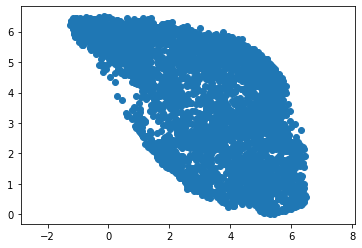

In [163]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')

In [164]:
embedding_df = pd.DataFrame(embedding)

In [165]:
embedding_df['ImgName'] = list(mae_df['ImgName'])

In [166]:
embedding_df.head()

0         1                                            ImgName
0  2.706845  5.467804  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...
1 -0.591882  6.445505  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...
2  1.213972  6.007986  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...
3  4.800104  2.383724  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...
4  1.463930  3.384902  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...

In [167]:
embedding_df.shape

(3733, 3)

In [168]:
embedding_df.iloc[0,-1]

'/gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/TumorNormal_MAE_DEV_epoch_499/MAE_vectors/Normal/TNE1011_11521_33025.npy'

In [169]:
img_def = []
for i in range(embedding_df.shape[0]):
    img_def.append(embedding_df.iloc[i,-1][84:-3] +'jpg')


In [170]:
embedding_df['img_def'] = img_def

In [171]:
img_def = []
for i in range(df_all_499.shape[0]):
    img_def.append(df_all_499.iloc[i,0][71:-3] +'jpg')

In [172]:
df_all_499['img_def'] = img_def

In [173]:
df_all_499.head()

Path2Image  Sample          Loss  \
1518  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1767  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
445   /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
1855  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
98    /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

      MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID       MSE  \
1518         -0.563197        -0.495072    499  Test  TNE1417  0.005811   
1767         -0.548285        -0.503347    499  Test  TNE1417  0.004618   
445          -0.587729        -0.504280    499  Test  TNE1011  0.004492   
1855         -0.544216        -0.505963    499  Test  TNE1417  0.004269   
98           -0.563386        -0.506407    499  Test  TNE0869  0.004212   

      Binary_label                          img_def  
1518             0   /Normal/TNE1417_9601_31489.jpg  
1767             0   /Normal/TNE1417_9601_32641.jpg  
445              0  /Normal/TNE1011_11521_32257.jpg  
1855             0   /Normal/TNE1417_9985_32257.jpg  
98               0  /Normal/TNE0869_22273_17281.jpg

In [174]:
df_all_499_umap = df_all_499.merge(embedding_df, left_on='img_def', right_on='img_def')

In [175]:
df_all_499_umap.head()

Path2Image  Sample          Loss  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

   MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID       MSE  \
0         -0.563197        -0.495072    499  Test  TNE1417  0.005811   
1         -0.548285        -0.503347    499  Test  TNE1417  0.004618   
2         -0.587729        -0.504280    499  Test  TNE1011  0.004492   
3         -0.544216        -0.505963    499  Test  TNE1417  0.004269   
4         -0.563386        -0.506407    499  Test  TNE0869  0.004212   

   Binary_label                          img_def         0         1  \
0             0   /Normal/TNE1417_9601_31489.jpg -1.159385  6.165211   
1             0   /Normal/TNE1417_9601_32641.jpg  0.380633  4.732059   
2             0  /Normal/TNE1011_11521_32257.jpg  2.306228  2.841487   
3             0   /Normal/TNE1417_9985_32257.jpg -0.068724  5.848712   
4             0  /Normal/TNE0869_22273_17281.jpg -0.398697  5.507006   

                                             ImgName  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
1  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
2  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
3  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
4  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...

In [176]:
df_all_499.iloc[0,-1].split('/')[-1][:7]

'TNE1417'

In [177]:
patient_id = [] 
for i in range(df_all_499_umap.shape[0]):
    patient_id.append(df_all_499_umap.iloc[i,-1].split('/')[-1][:7])
df_all_499_umap['patient'] = patient_id

<AxesSubplot:xlabel='0', ylabel='1'>

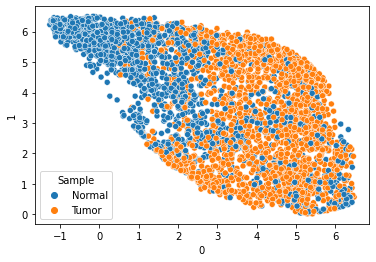

In [178]:
sns.scatterplot(x=0, y=1,
              hue="Sample",
              data=df_all_499_umap)

<AxesSubplot:xlabel='0', ylabel='1'>

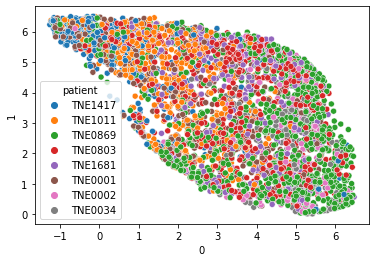

In [179]:
sns.scatterplot(x=0, y=1,
              hue="patient",
              data=df_all_499_umap)

In [180]:
df_all_499_umap_test = df_all_499_umap[df_all_499_umap['Set'] == 'Test']

<AxesSubplot:xlabel='0', ylabel='1'>

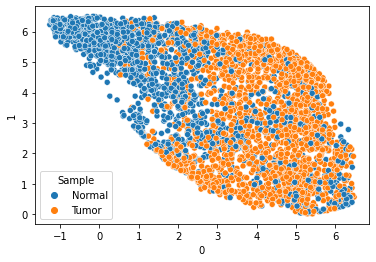

In [181]:
sns.scatterplot(x=0, y=1,
              hue="Sample",
              data=df_all_499_umap)

## UMAP 2: 3D

In [182]:
%matplotlib inline


In [183]:
reducer = umap.UMAP( n_components = 3)
embedding = reducer.fit_transform(scaled_mae_data)
embedding.shape

(3733, 3)

In [184]:
embedding_df = pd.DataFrame(embedding)
embedding_df['ImgName'] = list(mae_df['ImgName'])
img_def = []
for i in range(embedding_df.shape[0]):
    img_def.append(embedding_df.iloc[i,-1][84:-3] +'jpg')
embedding_df['img_def'] = img_def
df_all_499_umap = df_all_499.merge(embedding_df, left_on='img_def', right_on='img_def')

In [185]:
df_all_499_umap = df_all_499.merge(embedding_df, left_on='img_def', right_on='img_def')

In [186]:
df_all_499_umap.shape

(3733, 15)

In [187]:
df_all_499_umap.head()

Path2Image  Sample          Loss  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

   MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID       MSE  \
0         -0.563197        -0.495072    499  Test  TNE1417  0.005811   
1         -0.548285        -0.503347    499  Test  TNE1417  0.004618   
2         -0.587729        -0.504280    499  Test  TNE1011  0.004492   
3         -0.544216        -0.505963    499  Test  TNE1417  0.004269   
4         -0.563386        -0.506407    499  Test  TNE0869  0.004212   

   Binary_label                          img_def         0         1  \
0             0   /Normal/TNE1417_9601_31489.jpg -0.303083  7.317651   
1             0   /Normal/TNE1417_9601_32641.jpg  0.374019  5.285200   
2             0  /Normal/TNE1011_11521_32257.jpg  1.637996  2.856461   
3             0   /Normal/TNE1417_9985_32257.jpg  0.482936  6.589160   
4             0  /Normal/TNE0869_22273_17281.jpg  0.047798  6.338193   

          2                                            ImgName  
0  5.239825  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
1  5.193277  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
2  4.826979  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
3  5.093144  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
4  5.192772  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...

In [188]:
df_all_499_umap_test = df_all_499_umap[df_all_499_umap['Set'] == 'Test']

In [189]:
df_all_499_umap_test.shape

(3733, 15)

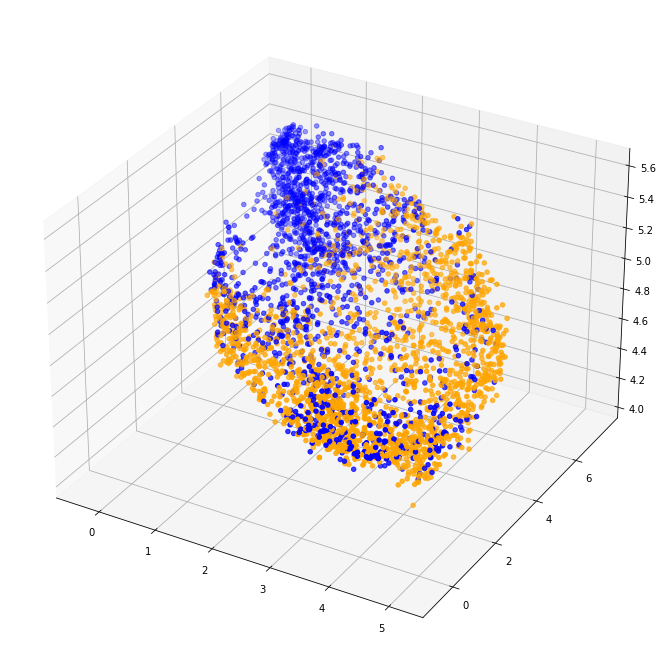

In [190]:
colors = {'Normal':'blue', 'Tumor':'orange'}
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_all_499_umap_test[0], df_all_499_umap_test[1], df_all_499_umap_test[2], 
           c=df_all_499_umap_test['Sample'].map(colors))

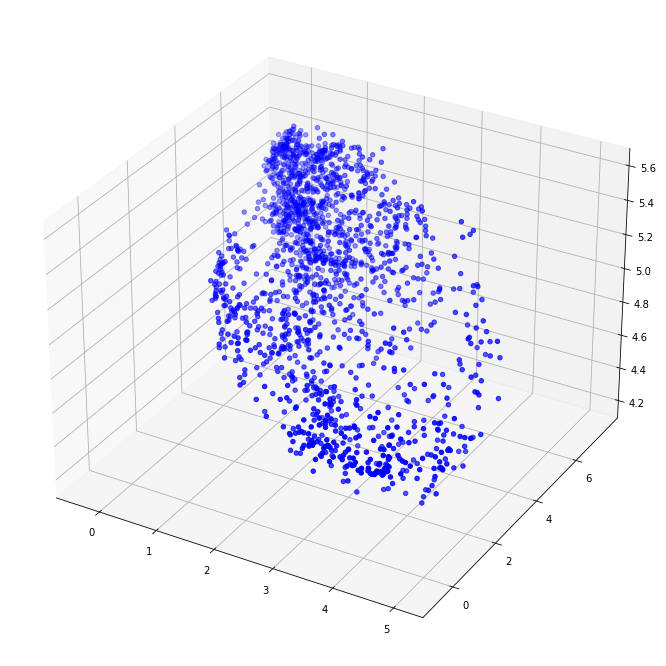

In [191]:
df_all_499_umap_test_normal = df_all_499_umap_test[df_all_499_umap_test['Sample'] == 'Normal']
colors = {'Normal':'blue', 'Tumor':'orange'}
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_all_499_umap_test_normal[0], df_all_499_umap_test_normal[1], df_all_499_umap_test_normal[2], 
           c=df_all_499_umap_test_normal['Sample'].map(colors))

**KMeans clustering**

In [192]:
from sklearn.cluster import KMeans

In [193]:
df_all_499_umap_test_normal.head()

Path2Image  Sample          Loss  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -49132.376953   

   MeanAnomalyScore  MaxAnomalyScore  Epoch   Set    TNEID       MSE  \
0         -0.563197        -0.495072    499  Test  TNE1417  0.005811   
1         -0.548285        -0.503347    499  Test  TNE1417  0.004618   
2         -0.587729        -0.504280    499  Test  TNE1011  0.004492   
3         -0.544216        -0.505963    499  Test  TNE1417  0.004269   
4         -0.563386        -0.506407    499  Test  TNE0869  0.004212   

   Binary_label                          img_def         0         1  \
0             0   /Normal/TNE1417_9601_31489.jpg -0.303083  7.317651   
1             0   /Normal/TNE1417_9601_32641.jpg  0.374019  5.285200   
2             0  /Normal/TNE1011_11521_32257.jpg  1.637996  2.856461   
3             0   /Normal/TNE1417_9985_32257.jpg  0.482936  6.589160   
4             0  /Normal/TNE0869_22273_17281.jpg  0.047798  6.338193   

          2                                            ImgName  
0  5.239825  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
1  5.193277  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
2  4.826979  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
3  5.093144  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
4  5.192772  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...

In [194]:
Umap_val = df_all_499_umap_test_normal.iloc[:, -4:-1]

In [195]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(Umap_val)

In [196]:
kmeans.labels_

array([1, 1, 0, ..., 2, 0, 0], dtype=int32)

In [197]:
df_all_499_umap_test_normal['kmeans'] = kmeans.labels_

<ipython-input-197-5da930006275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_499_umap_test_normal['kmeans'] = kmeans.labels_


In [198]:
df_all_499_umap_test_normal['kmeans'
                        ]

0       1
1       1
2       0
3       1
4       1
       ..
3726    1
3727    2
3730    2
3731    0
3732    0
Name: kmeans, Length: 1733, dtype: int32

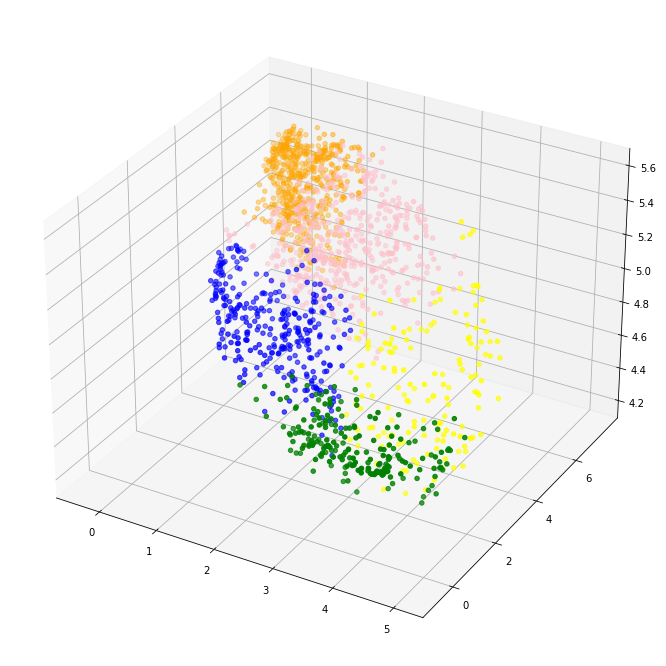

In [199]:
colors = {0:'blue', 1:'orange' , 2:'green',  3:'pink', 4:'yellow' }
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_all_499_umap_test_normal[0], df_all_499_umap_test_normal[1], df_all_499_umap_test_normal[2], 
           c=df_all_499_umap_test_normal['kmeans'].map(colors))

In [200]:
df_all_499_umap_test.to_csv('UMAP_Mae_TestSetTumorNormal.csv')

#### nn = 200

In [201]:
reducer = umap.UMAP( n_components = 3, n_neighbors = 200)
embedding = reducer.fit_transform(scaled_mae_data)


AttributeError: 'numpy.ndarray' object has no attribute 'shapereducer'

In [202]:
embedding_df = pd.DataFrame(embedding)
embedding_df['ImgName'] = list(mae_df['ImgName'])
img_def = []
for i in range(embedding_df.shape[0]):
    img_def.append(embedding_df.iloc[i,-1][84:-3] +'jpg')
embedding_df['img_def'] = img_def
df_all_499_umap = df_all_499.merge(embedding_df, left_on='img_def', right_on='img_def')

In [203]:
df_all_499_umap = df_all_499.merge(embedding_df, left_on='img_def', right_on='img_def')

In [204]:
df_all_499_umap_test = df_all_499_umap[df_all_499_umap['Set'] == 'Test']

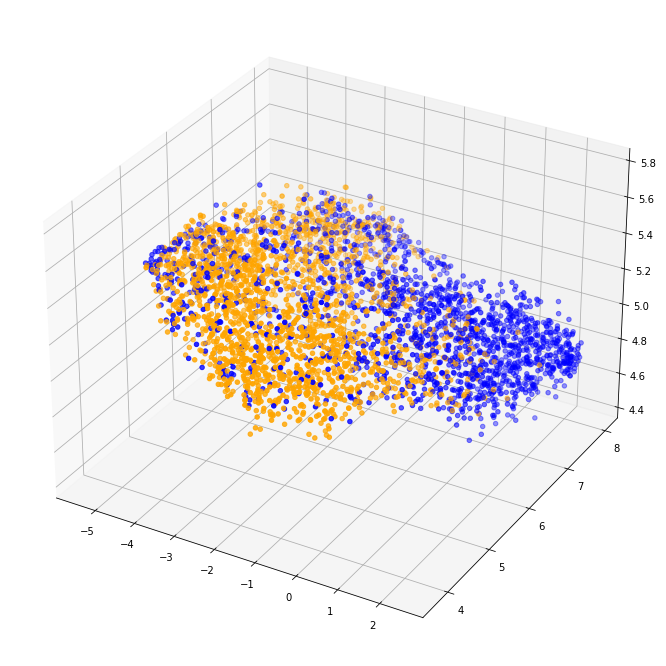

In [205]:
colors = {'Normal':'blue', 'Tumor':'orange'}
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_all_499_umap_test[0], df_all_499_umap_test[1], df_all_499_umap_test[2], 
           c=df_all_499_umap_test['Sample'].map(colors))

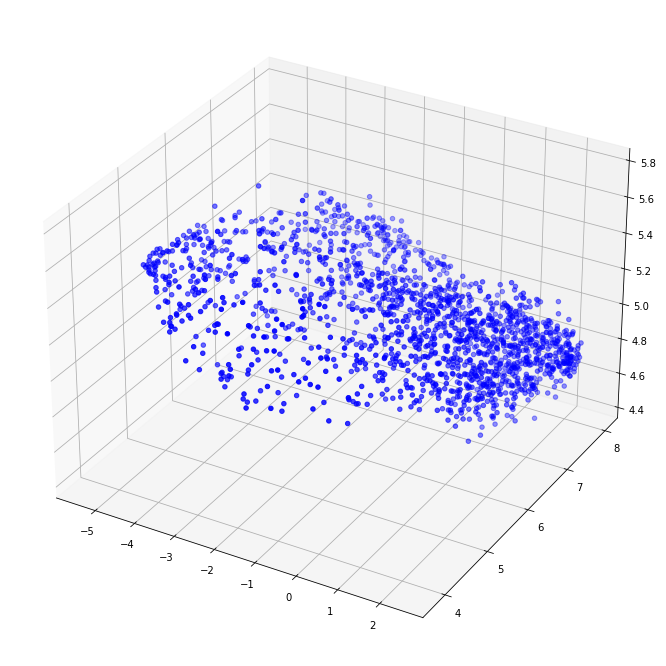

In [206]:
df_all_499_umap_test_normal = df_all_499_umap_test[df_all_499_umap_test['Sample'] == 'Normal']
colors = {'Normal':'blue', 'Tumor':'orange'}
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_all_499_umap_test_normal[0], df_all_499_umap_test_normal[1], df_all_499_umap_test_normal[2], 
           c=df_all_499_umap_test_normal['Sample'].map(colors))

In [207]:
Umap_val = df_all_499_umap_test_normal.iloc[:, -4:-1]

In [208]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(Umap_val)

In [ ]:
kmeans.labels_

In [ ]:
df_all_499_umap_test_normal['kmeans'] = kmeans.labels_

In [ ]:
colors = {0:'blue', 1:'orange' , 2:'green',  3:'pink', 4:'yellow' }
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_all_499_umap_test_normal[0], df_all_499_umap_test_normal[1], df_all_499_umap_test_normal[2], 
           c=df_all_499_umap_test_normal['kmeans'].map(colors))

In [253]:
import matplotlib
matplotlib.__version__

'3.4.2'

<AxesSubplot:xlabel='1', ylabel='2'>

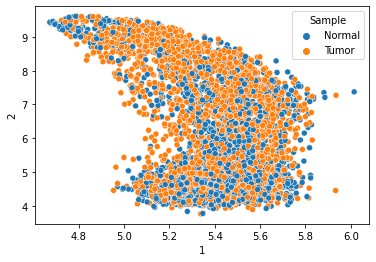

In [254]:
sns.scatterplot(x=1, y=2,
              hue="Sample",
              data=df_all_499_umap)

<AxesSubplot:xlabel='0', ylabel='2'>

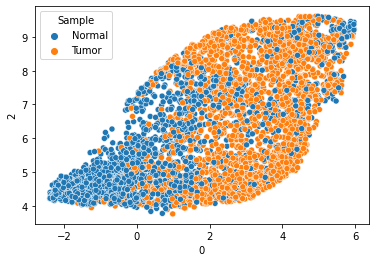

In [255]:
sns.scatterplot(x=0, y=2,
              hue="Sample",
              data=df_all_499_umap)

In [114]:
import numpy as np
from sklearn.decomposition import PCA

In [135]:
pca = PCA(n_components=3
         )

In [136]:
pca.fit(scaled_mae_data)

PCA(n_components=3)

In [137]:
print(pca.explained_variance_ratio_)

[0.16307238 0.05852704 0.0143879 ]


In [138]:
pca_fit = pca.fit_transform(scaled_mae_data)

In [140]:
pca_fit_df = pd.DataFrame(pca_fit, columns = ['Component1','Component2', 'Component3'])

pca_fit_df['ImgName'] = list(mae_df['ImgName'])

In [ ]:
pca_fit_df.head()

In [141]:
pca_fit_df = pd.DataFrame(pca_fit, columns = ['Component1','Component2', 'Component3'])


In [142]:
pca_fit_df['ImgName'] = list(mae_df['ImgName'])
img_def = []
for i in range(pca_fit_df.shape[0]):
    print(pca_fit_df.iloc[i,-1][84:-3] +'jpg')
    img_def.append(pca_fit_df.iloc[i,-1][84:-3] +'jpg')


/Normal/TNE1011_11521_33025.jpg
/Normal/TNE1417_10369_35713.jpg
/Normal/TNE1011_19201_24193.jpg
/Normal/TNE0803_14209_16897.jpg
/Normal/TNE0803_8833_47233.jpg
/Normal/TNE1417_16513_26113.jpg
/Normal/TNE1417_17665_31489.jpg
/Normal/TNE1508_12673_43393.jpg
/Normal/TNE0002_12673_14977.jpg
/Normal/TNE0001_10753_41089.jpg
/Normal/TNE0803_5761_28801.jpg
/Normal/TNE1508_12289_44161.jpg
/Normal/TNE0001_32257_8449.jpg
/Normal/TNE1417_16129_23809.jpg
/Normal/TNE0803_13825_49153.jpg
/Normal/TNE1508_9985_43009.jpg
/Normal/TNE0803_6145_31489.jpg
/Normal/TNE1508_12673_49537.jpg
/Normal/TNE1011_19201_29569.jpg
/Normal/TNE0803_13825_23041.jpg
/Normal/TNE0803_13825_50689.jpg
/Normal/TNE1417_17665_54913.jpg
/Normal/TNE1417_16897_22273.jpg
/Normal/TNE0869_14209_31489.jpg
/Normal/TNE0869_15745_26113.jpg
/Normal/TNE1681_7297_58753.jpg
/Normal/TNE1011_26113_26113.jpg
/Normal/TNE1011_16897_26113.jpg
/Normal/TNE0869_19969_30337.jpg
/Normal/TNE0869_20353_36481.jpg
/Normal/TNE0803_4993_34945.jpg
/Normal/TNE0803

/Tumor/TNE0869_14209_56065.jpg
/Tumor/TNE1011_26497_26497.jpg
/Tumor/TNE0869_23425_54145.jpg
/Tumor/TNE1508_32257_25729.jpg
/Tumor/TNE1011_17281_13057.jpg
/Tumor/TNE1508_28417_44929.jpg
/Tumor/TNE1681_47617_46081.jpg
/Tumor/TNE0002_6913_14977.jpg
/Tumor/TNE0034_14593_14209.jpg
/Tumor/TNE0034_11905_8065.jpg
/Tumor/TNE1011_14209_37633.jpg
/Tumor/TNE1011_25345_14209.jpg
/Tumor/TNE1681_36097_56833.jpg
/Tumor/TNE1011_24577_13825.jpg
/Tumor/TNE0001_23041_31873.jpg
/Tumor/TNE0869_19969_55681.jpg
/Tumor/TNE0002_5761_13825.jpg
/Tumor/TNE0803_9985_27649.jpg
/Tumor/TNE1011_16513_23041.jpg
/Tumor/TNE1508_22657_34945.jpg
/Tumor/TNE0869_20353_56833.jpg
/Tumor/TNE1417_34945_23809.jpg
/Tumor/TNE0034_13825_8065.jpg
/Tumor/TNE1681_55297_41089.jpg
/Tumor/TNE0869_23425_52225.jpg
/Tumor/TNE0869_16129_57601.jpg
/Tumor/TNE1681_36097_51457.jpg
/Tumor/TNE1681_49153_48769.jpg
/Tumor/TNE0001_24961_28033.jpg
/Tumor/TNE0034_14977_66049.jpg
/Tumor/TNE1681_47233_39937.jpg
/Tumor/TNE0034_12673_15361.jpg
/Tumor/TNE101

/Tumor/TNE0869_23041_41089.jpg
/Tumor/TNE0803_9985_27265.jpg
/Tumor/TNE0869_20353_61057.jpg
/Tumor/TNE0803_9601_30337.jpg
/Tumor/TNE0869_23425_47617.jpg
/Tumor/TNE0803_8065_29953.jpg
/Tumor/TNE0034_13057_62209.jpg
/Tumor/TNE0034_15361_65281.jpg
/Tumor/TNE1681_36481_54529.jpg
/Tumor/TNE0001_33025_31489.jpg
/Tumor/TNE1508_31873_31105.jpg
/Tumor/TNE0803_9217_29185.jpg
/Tumor/TNE0034_14209_1153.jpg
/Tumor/TNE0034_9985_63361.jpg
/Tumor/TNE0803_10369_24577.jpg
/Tumor/TNE0001_24961_16897.jpg
/Tumor/TNE1681_48001_39553.jpg
/Tumor/TNE0869_25729_49537.jpg
/Tumor/TNE0001_32641_19585.jpg
/Tumor/TNE1011_23041_7297.jpg
/Tumor/TNE0869_16897_46081.jpg
/Tumor/TNE0001_23809_29953.jpg
/Tumor/TNE0002_10753_11905.jpg
/Tumor/TNE0002_4993_16513.jpg
/Tumor/TNE0869_17665_61825.jpg
/Tumor/TNE0803_6913_31873.jpg
/Tumor/TNE0001_9985_34561.jpg
/Tumor/TNE1681_54913_74113.jpg
/Tumor/TNE0001_24961_26881.jpg
/Tumor/TNE1011_19585_33793.jpg
/Tumor/TNE0002_11905_15361.jpg
/Tumor/TNE0869_23041_51841.jpg
/Tumor/TNE0869_234

In [143]:
pca_fit_df['img_def'] = img_def
df_all_499_pca = df_all_499.merge(pca_fit_df, left_on='img_def', right_on='img_def')

In [144]:
df_all_499_pca.head()

Path2Image  Sample          Loss  \
0  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -55221.830566   
1  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -48619.432617   
2  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -52172.487793   
3  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -44562.725586   
4  /gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...  Normal -50702.970703   

   MeanAnomalyScore  MaxAnomalyScore  Epoch   Set       MSE  \
0         -0.563197        -0.495072    499  Test  0.005811   
1         -0.551963        -0.500628    499  Test  0.004995   
2         -0.548285        -0.503347    499  Test  0.004618   
3         -0.587729        -0.504280    499  Test  0.004492   
4         -0.544216        -0.505963    499  Test  0.004269   

                           img_def  Component1  Component2  Component3  \
0   /Normal/TNE1417_9601_31489.jpg -186.541458  -45.810734   59.517624   
1  /Normal/TNE1508_10369_41473.jpg -162.370651  -24.228662   60.296574   
2   /Normal/TNE1417_9601_32641.jpg  -96.700394  -74.085121   10.615376   
3  /Normal/TNE1011_11521_32257.jpg    3.059185  -40.235615   -9.540419   
4   /Normal/TNE1417_9985_32257.jpg -147.039429    0.076107   26.684998   

                                             ImgName  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
1  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
2  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
3  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
4  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...

<AxesSubplot:xlabel='Component1', ylabel='Component2'>

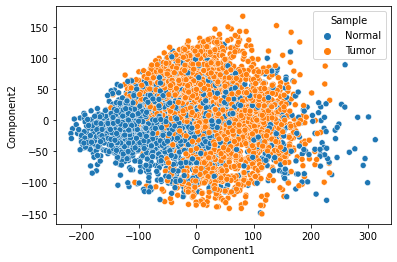

In [145]:
sns.scatterplot(x='Component1', y= 'Component2',
              hue="Sample",
              data=df_all_499_pca)

<AxesSubplot:xlabel='Component1', ylabel='Component3'>

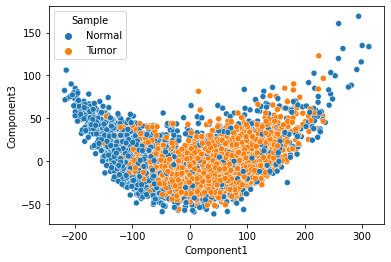

In [146]:
sns.scatterplot(x='Component1', y= 'Component3',
              hue="Sample",
              data=df_all_499_pca)

<AxesSubplot:xlabel='Component2', ylabel='Component3'>

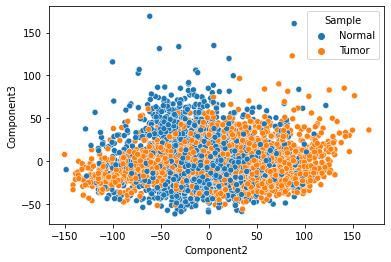

In [147]:
sns.scatterplot(x='Component2', y= 'Component3',
              hue="Sample",
              data=df_all_499_pca)

In [148]:
mae_df.head()

0         1         2         3         4         5         6  \
0 -0.215586 -0.675141 -1.677863 -0.760148  0.666932 -0.471778 -1.069583   
0  0.476969 -0.924681 -0.779073 -0.860724  0.364853 -0.643009 -0.332356   
0 -0.288117 -0.473814 -1.201604 -0.823989  0.372110 -0.487496 -0.470508   
0 -0.793107 -0.381201 -2.019806 -0.695371  0.970616 -0.710965 -1.013954   
0 -0.211543 -0.386013 -1.251424 -0.874929  0.858171 -0.847062 -0.882323   

          7         8         9  ...     50167     50168     50169     50170  \
0 -1.650139  2.212206  1.759855  ...  0.078600 -0.999975 -0.839198 -1.847912   
0 -2.272222  2.370223  1.283393  ... -0.062720 -1.622359 -1.536779 -1.808048   
0 -2.077661  2.413996  1.803412  ... -0.196501 -0.833792 -0.672008 -0.566497   
0 -1.394406  2.395215  1.803538  ... -0.029618 -1.143789  0.206407 -1.900309   
0 -2.139157  2.554722  1.289893  ... -0.008373 -1.693096 -1.297319 -1.095317   

      50171     50172     50173     50174     50175  \
0  1.472525 -1.186765  0.558750 -0.342530 -0.346693   
0  1.399874 -0.996631 -0.025515 -0.538562 -0.618882   
0  1.320784 -0.740149  0.066851 -1.149514 -0.669112   
0  0.627928 -0.571640  1.169022 -0.373459 -0.647311   
0  1.342206 -0.149261  0.476094 -0.355745 -0.904094   

                                             ImgName  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  

[5 rows x 50177 columns]

In [261]:
sample = [] 
for i in range(mae_df.shape[0]):
    sample.append(mae_df.iloc[i,-1][92:92+7])


In [262]:
mae_df['sample'] = sample

In [263]:
mae_df.head()

0         1         2         3         4         5         6  \
0 -0.215586 -0.675141 -1.677863 -0.760148  0.666932 -0.471778 -1.069583   
0  0.476969 -0.924681 -0.779073 -0.860724  0.364853 -0.643009 -0.332356   
0 -0.288117 -0.473814 -1.201604 -0.823989  0.372110 -0.487496 -0.470508   
0 -0.793107 -0.381201 -2.019806 -0.695371  0.970616 -0.710965 -1.013954   
0 -0.211543 -0.386013 -1.251424 -0.874929  0.858171 -0.847062 -0.882323   

          7         8         9  ...     50168     50169     50170     50171  \
0 -1.650139  2.212206  1.759855  ... -0.999975 -0.839198 -1.847912  1.472525   
0 -2.272222  2.370223  1.283393  ... -1.622359 -1.536779 -1.808048  1.399874   
0 -2.077661  2.413996  1.803412  ... -0.833792 -0.672008 -0.566497  1.320784   
0 -1.394406  2.395215  1.803538  ... -1.143789  0.206407 -1.900309  0.627928   
0 -2.139157  2.554722  1.289893  ... -1.693096 -1.297319 -1.095317  1.342206   

      50172     50173     50174     50175  \
0 -1.186765  0.558750 -0.342530 -0.346693   
0 -0.996631 -0.025515 -0.538562 -0.618882   
0 -0.740149  0.066851 -1.149514 -0.669112   
0 -0.571640  1.169022 -0.373459 -0.647311   
0 -0.149261  0.476094 -0.355745 -0.904094   

                                             ImgName   sample  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE1011  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE1417  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE1011  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0803  
0  /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0803  

[5 rows x 50178 columns]

In [278]:
mae_df.iloc[0,-2]

'/gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/TumorNormal_MAE_DEV_epoch_499/MAE_vectors/Normal/TNE1011_11521_33025.npy'

In [274]:
mae_df[mae_df['sample']  == 'TNE0001']

0         1         2         3         4         5         6  \
0   0.164611 -0.738633 -1.121432 -0.682980  0.807291 -0.784435 -0.925343   
0  -0.239216 -0.298620 -1.234913 -1.066413  0.878714 -0.963990 -1.023077   
0  -0.275845 -0.347126 -1.548207 -0.663258  1.101249 -1.066716 -1.419064   
0  -0.036628 -0.431960 -1.399382 -0.762670  1.018512 -1.153751 -1.345132   
0  -0.257149 -0.678574 -1.536939 -0.934515  0.838289 -0.507136 -0.815874   
..       ...       ...       ...       ...       ...       ...       ...   
0  -0.512550 -1.310776 -1.070045 -0.775318  0.237494 -0.222397 -0.595986   
0   0.282425 -0.823822 -1.027320 -0.642733  0.314241 -0.734271 -0.652945   
0   0.375998 -0.770990 -0.763637 -0.592866  0.146930 -0.469265 -0.388677   
0  -0.405847 -0.409427 -0.999881 -0.881147  0.465057 -0.845668 -1.074900   
0  -0.455415 -0.623663 -1.541977 -0.685318  0.984715 -1.134810 -1.313439   

           7         8         9  ...     50168     50169     50170     50171  \
0  -2.148094  2.261096  1.466111  ... -0.497168 -0.360854 -0.820213  0.497685   
0  -2.345910  2.370928  1.361691  ... -0.969084 -0.121069 -1.059290  1.034715   
0  -1.943135  2.306446  1.692385  ... -1.133690  0.096364 -1.588601  1.347886   
0  -2.236893  2.414948  1.430017  ... -1.085608  0.048302 -1.524151  1.608086   
0  -1.842251  2.194896  1.561655  ... -1.327714  0.012508 -1.639455  0.608541   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0  -2.020214  2.321894  1.688662  ... -1.213186 -1.385686 -1.339489  1.381692   
0  -2.182287  2.218982  1.777807  ... -1.402100 -0.318491 -1.551430  1.249863   
0  -2.210548  2.021500  1.451190  ... -1.467764 -0.999047 -1.530789  1.570648   
0  -2.381785  2.412356  1.276382  ... -1.163905 -0.217897 -1.560560  1.060530   
0  -1.796050  2.458909  1.525640  ... -1.071542 -0.040656 -1.554598  0.707946   

       50172     50173     50174     50175  \
0   0.478741  1.016173 -0.139512 -0.287543   
0  -0.302948  0.469910 -0.676074 -0.916321   
0  -0.294772  2.014570  0.088519 -0.012869   
0  -0.674543  0.862932 -0.519207 -0.678139   
0  -0.134658  0.424178 -0.319588 -0.406822   
..       ...       ...       ...       ...   
0  -1.343522 -0.093482 -0.335793  0.052093   
0  -0.236837 -0.376006 -0.288519 -0.506928   
0  -0.035023 -0.535244 -0.269256 -0.393889   
0  -0.927850  0.884328 -0.776354 -0.705634   
0  -1.472004  0.865960 -0.003336 -0.823136   

                                              ImgName   sample  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  
..                                                ...      ...  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  
0   /gpfsscratch/rech/ohv/ueu39kt/FastFlow/res/Tum...  TNE0001  

[246 rows x 50178 columns]

In [303]:
for i in range(mae_df.shape[0]):
    print(mae_df.iloc[i,-1], mae_df.iloc[i,-2].split('/')[-2])

TNE1011 Normal
TNE1417 Normal
TNE1011 Normal
TNE0803 Normal
TNE0803 Normal
TNE1417 Normal
TNE1417 Normal
TNE1508 Normal
TNE0002 Normal
TNE0001 Normal
TNE0803 Normal
TNE1508 Normal
TNE0001 Normal
TNE1417 Normal
TNE0803 Normal
TNE1508 Normal
TNE0803 Normal
TNE1508 Normal
TNE1011 Normal
TNE0803 Normal
TNE0803 Normal
TNE1417 Normal
TNE1417 Normal
TNE0869 Normal
TNE0869 Normal
TNE1681 Normal
TNE1011 Normal
TNE1011 Normal
TNE0869 Normal
TNE0869 Normal
TNE0803 Normal
TNE0803 Normal
TNE0869 Normal
TNE0869 Normal
TNE0803 Normal
TNE1417 Normal
TNE0869 Normal
TNE0869 Normal
TNE1508 Normal
TNE1417 Normal
TNE1011 Normal
TNE1417 Normal
TNE0803 Normal
TNE0869 Normal
TNE1508 Normal
TNE0869 Normal
TNE0803 Normal
TNE1417 Normal
TNE0034 Normal
TNE0001 Normal
TNE0869 Normal
TNE0869 Normal
TNE0869 Normal
TNE0869 Normal
TNE1011 Normal
TNE0001 Normal
TNE0001 Normal
TNE0001 Normal
TNE1417 Normal
TNE1011 Normal
TNE0803 Normal
TNE1417 Normal
TNE0869 Normal
TNE0869 Normal
TNE0001 Normal
TNE1681 Normal
TNE0869 No

TNE0869 Normal
TNE1681 Normal
TNE0869 Normal
TNE1508 Normal
TNE0803 Normal
TNE0001 Normal
TNE0869 Normal
TNE0001 Normal
TNE1011 Normal
TNE1011 Normal
TNE1508 Normal
TNE0001 Normal
TNE1417 Normal
TNE1417 Normal
TNE0869 Normal
TNE0803 Normal
TNE0803 Normal
TNE1011 Normal
TNE0869 Normal
TNE1508 Normal
TNE1011 Normal
TNE0803 Normal
TNE1508 Normal
TNE0001 Normal
TNE1681 Normal
TNE0803 Normal
TNE0869 Normal
TNE1508 Normal
TNE1417 Normal
TNE1417 Normal
TNE0001 Normal
TNE1417 Normal
TNE1508 Normal
TNE0869 Normal
TNE0034 Normal
TNE0869 Normal
TNE1681 Normal
TNE1011 Normal
TNE0803 Normal
TNE1417 Normal
TNE0001 Normal
TNE0001 Normal
TNE0869 Normal
TNE0803 Normal
TNE0001 Normal
TNE0869 Normal
TNE0001 Normal
TNE0001 Normal
TNE0001 Normal
TNE0001 Normal
TNE1417 Normal
TNE0001 Normal
TNE1681 Normal
TNE0869 Normal
TNE0869 Normal
TNE1011 Normal
TNE1508 Normal
TNE1417 Normal
TNE0803 Normal
TNE0869 Normal
TNE0803 Normal
TNE1508 Normal
TNE1011 Normal
TNE0803 Normal
TNE1681 Normal
TNE1011 Normal
TNE0803 No

NE1508_ Tumor
NE0803_ Tumor
NE0001_ Tumor
NE0803_ Tumor
NE1681_ Tumor
NE0869_ Tumor
NE0803_ Tumor
NE0002_ Tumor
NE0034_ Tumor
NE1681_ Tumor
NE0002_ Tumor
NE1681_ Tumor
NE0803_ Tumor
NE1508_ Tumor
NE1011_ Tumor
NE1011_ Tumor
NE1011_ Tumor
NE1508_ Tumor
NE0002_ Tumor
NE1011_ Tumor
NE1011_ Tumor
NE0803_ Tumor
NE1011_ Tumor
NE1681_ Tumor
NE0002_ Tumor
NE1011_ Tumor
NE0869_ Tumor
NE0001_ Tumor
NE1681_ Tumor
NE0803_ Tumor
NE0002_ Tumor
NE1681_ Tumor
NE0001_ Tumor
NE1508_ Tumor
NE0002_ Tumor
NE1011_ Tumor
NE0001_ Tumor
NE1508_ Tumor
NE0869_ Tumor
NE0001_ Tumor
NE1681_ Tumor
NE1011_ Tumor
NE0001_ Tumor
NE0869_ Tumor
NE1508_ Tumor
NE0034_ Tumor
NE0001_ Tumor
NE0803_ Tumor
NE1011_ Tumor
NE0803_ Tumor
NE0803_ Tumor
NE0002_ Tumor
NE0803_ Tumor
NE1508_ Tumor
NE0803_ Tumor
NE0803_ Tumor
NE0869_ Tumor
NE0034_ Tumor
NE0034_ Tumor
NE1011_ Tumor
NE0869_ Tumor
NE1508_ Tumor
NE0869_ Tumor
NE0869_ Tumor
NE0034_ Tumor
NE0803_ Tumor
NE0869_ Tumor
NE0034_ Tumor
NE0869_ Tumor
NE0001_ Tumor
NE0869_ Tumor
NE0869

NE0034_ Tumor
NE0869_ Tumor
NE1011_ Tumor
NE1011_ Tumor
NE0002_ Tumor
NE0803_ Tumor
NE0034_ Tumor
NE1011_ Tumor
NE0034_ Tumor
NE0001_ Tumor
NE1011_ Tumor
NE0869_ Tumor
NE0001_ Tumor
NE0002_ Tumor
NE1011_ Tumor
NE0803_ Tumor
NE0001_ Tumor
NE0803_ Tumor
NE0803_ Tumor
NE0034_ Tumor
NE0803_ Tumor
NE1681_ Tumor
NE0803_ Tumor
NE0002_ Tumor
NE1681_ Tumor
NE0001_ Tumor
NE0803_ Tumor
NE1011_ Tumor
NE0869_ Tumor
NE1681_ Tumor
NE0002_ Tumor
NE1011_ Tumor
NE1681_ Tumor
NE0001_ Tumor
NE0803_ Tumor
NE0034_ Tumor
NE0869_ Tumor
NE0869_ Tumor
NE0001_ Tumor
NE1508_ Tumor
NE1681_ Tumor
NE1011_ Tumor
NE1681_ Tumor
NE0869_ Tumor
NE0869_ Tumor
NE0869_ Tumor
NE0869_ Tumor
NE0869_ Tumor
NE1681_ Tumor
NE0001_ Tumor
NE0869_ Tumor
NE0869_ Tumor
NE1417_ Tumor
NE0001_ Tumor
NE1508_ Tumor
NE0803_ Tumor
NE1681_ Tumor
NE0869_ Tumor
NE1681_ Tumor
NE0803_ Tumor
NE0869_ Tumor
NE0869_ Tumor
NE1011_ Tumor
NE1011_ Tumor
NE0001_ Tumor
NE0869_ Tumor
NE0803_ Tumor
NE0034_ Tumor
NE1011_ Tumor
NE1508_ Tumor
NE0869_ Tumor
NE0869

In [299]:
mae_df_TNE1417 = mae_df[mae_df['sample']  == 'TNE0001']
mae_df_TNE1417.shape

(246, 50178)

In [287]:
pca = PCA(n_components=3
         )

In [288]:
scaled_mae_data_TNE1417 = mae_df_TNE1417.iloc[:,:-2]

In [289]:
scaled_mae_data_TNE1417 = StandardScaler().fit_transform(scaled_mae_data_TNE1417)

In [290]:
pca.fit(scaled_mae_data_TNE1417)

PCA(n_components=3)

In [291]:
pca_fit = pca.fit_transform(scaled_mae_data_TNE1417)
pca_fit_df = pd.DataFrame(pca_fit, columns = ['Component1','Component2', 'Component3'])

pca_fit_df['ImgName'] = list(mae_df_TNE1417['ImgName'])

In [292]:
pca_fit_df['ImgName'] = list(mae_df_TNE1417['ImgName'])
img_def = []
type_ = []
for i in range(pca_fit_df.shape[0]):
    print(pca_fit_df.iloc[i,-1][84:-3] +'jpg')
    img_def.append(pca_fit_df.iloc[i,-1][84:-3] +'jpg')


/Normal/TNE0001_10753_41089.jpg
/Normal/TNE0001_32257_8449.jpg
/Normal/TNE0001_32641_8065.jpg
/Normal/TNE0001_29185_40321.jpg
/Normal/TNE0001_28417_42241.jpg
/Normal/TNE0001_18433_24193.jpg
/Normal/TNE0001_25345_48385.jpg
/Normal/TNE0001_4993_32257.jpg
/Normal/TNE0001_25345_43777.jpg
/Normal/TNE0001_24961_45313.jpg
/Normal/TNE0001_33025_8833.jpg
/Normal/TNE0001_28417_41857.jpg
/Normal/TNE0001_22273_41089.jpg
/Normal/TNE0001_11521_32257.jpg
/Normal/TNE0001_28033_44545.jpg
/Normal/TNE0001_22657_37249.jpg
/Normal/TNE0001_27265_47233.jpg
/Normal/TNE0001_25345_41089.jpg
/Normal/TNE0001_11137_39937.jpg
/Normal/TNE0001_28417_39553.jpg
/Normal/TNE0001_24961_48769.jpg
/Normal/TNE0001_8833_25729.jpg
/Normal/TNE0001_18817_28801.jpg
/Normal/TNE0001_18817_49537.jpg
/Normal/TNE0001_5377_29953.jpg
/Normal/TNE0001_29953_5761.jpg
/Normal/TNE0001_25345_49153.jpg
/Normal/TNE0001_7681_26881.jpg
/Normal/TNE0001_28801_41473.jpg
/Normal/TNE0001_29569_39553.jpg
/Normal/TNE0001_8449_26113.jpg
/Normal/TNE0001_2

In [293]:
pca_fit_df.shape

(246, 4)

In [294]:
pca_fit_df['img_def'] = img_def
df_all_499_pca = df_all_499.merge(pca_fit_df, left_on='img_def', right_on='img_def')

In [295]:
df_all_499_pca.shape

(246, 13)

<AxesSubplot:xlabel='Component1', ylabel='Component2'>

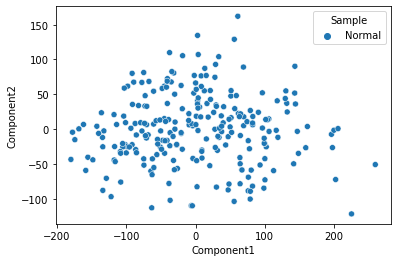

In [296]:
sns.scatterplot(x='Component1', y= 'Component2',
              hue="Sample",
              data=df_all_499_pca)

<AxesSubplot:xlabel='Component2', ylabel='Component3'>

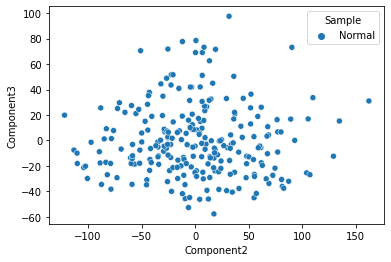

In [297]:
sns.scatterplot(x='Component2', y= 'Component3',
              hue="Sample",
              data=df_all_499_pca)

<AxesSubplot:xlabel='Component1', ylabel='Component3'>

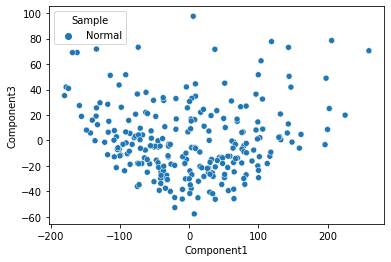

In [298]:
sns.scatterplot(x='Component1', y= 'Component3',
              hue="Sample",
              data=df_all_499_pca)